<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

<h3>3.1.3. Preprocessing of text</h3>

In [5]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [6]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    nlp_preprocessing(row['TEXT'], index, 'TEXT')
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

Time took for preprocessing the text : 230.4522264365255 seconds


In [7]:
data_text.head()

ID                                               TEXT
0   0  cyclin dependent kinases cdks regulate variety...
1   1  abstract background non small cell lung cancer...
2   2  abstract background non small cell lung cancer...
3   3  recent evidence demonstrated acquired uniparen...
4   4  oncogenic mutations monomeric casitas b lineag...

In [8]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [ ]:
geneoccure=[]
for j in range(0,3321):
    
    count=0
    for i in range(0,len((result.TEXT[j]).split()) ):
        if (result.Gene[j]).lower() == list((result.TEXT[j]).split())[i]:
            count += 1
    geneoccure.append(count)

In [ ]:
Textlen=[]
for i in range(0,3321):
    Textlen.append(len(result['TEXT'][i]))

## Final data which contain cleaned text,textlen and geneOccure

In [2]:
result=pd.read_csv('output.csv')
result.loc[:, 'Text_count']  = result["TEXT"].apply(lambda x: len(x.split()))
result.head()


ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  TextLen  GeneOccure  \
0  cyclin dependent kinases cdks regulate variety...    30836          34   
1  abstract background non small cell lung cancer...    27844         166   
2  abstract background non small cell lung cancer...    27844         166   
3  recent evidence demonstrated acquired uniparen...    28093         108   
4  oncogenic mutations monomeric casitas b lineag...    31649         178   

   Text_count  
0        4370  
1        4139  
2        4139  
3        3841  
4        4254

In [3]:
count_grp =result.groupby('Class')["Text_count"]
count_grp.describe()

count         mean          std     min      25%     50%       75%  \
Class                                                                       
1      568.0  6732.933099  4660.841668     1.0  3538.00  5221.0   9194.00   
2      452.0  6719.101770  5541.063060    81.0  2994.00  4961.0   8854.00   
3       89.0  4760.089888  2635.796764  1413.0  3064.00  3841.0   5073.00   
4      686.0  6433.342566  5186.348538    31.0  3211.00  4485.0   8173.25   
5      242.0  5283.466942  2726.521638   119.0  3539.75  4862.0   6683.75   
6      275.0  5207.629091  2789.077143     1.0  3233.00  4961.0   6220.00   
7      953.0  8257.098636  7315.668944     1.0  3563.00  5966.0  10544.00   
8       19.0  7785.000000  3931.219065  1433.0  4151.00  8054.0  11258.00   
9       37.0  9308.324324  7493.196025   809.0  3436.00  7985.0  11493.00   

           max  
Class           
1      36776.0  
2      46369.0  
3      19187.0  
4      30475.0  
5      17049.0  
6      17255.0  
7      56425.0  
8      14281.0  
9      33100.0

In [4]:
result.drop(result.loc[result['Text_count']==1.0].index, inplace=True)

In [5]:
count_grp =result.groupby('Class')["Text_count"]
count_grp.describe()

count         mean          std     min      25%     50%       75%  \
Class                                                                       
1      566.0  6756.720848  4651.811946   119.0  3538.00  5240.0   9218.00   
2      452.0  6719.101770  5541.063060    81.0  2994.00  4961.0   8854.00   
3       89.0  4760.089888  2635.796764  1413.0  3064.00  3841.0   5073.00   
4      686.0  6433.342566  5186.348538    31.0  3211.00  4485.0   8173.25   
5      242.0  5283.466942  2726.521638   119.0  3539.75  4862.0   6683.75   
6      273.0  5245.772894  2763.215228   159.0  3233.00  4961.0   6220.00   
7      952.0  8265.771008  7314.611276   303.0  3563.00  5966.0  10548.00   
8       19.0  7785.000000  3931.219065  1433.0  4151.00  8054.0  11258.00   
9       37.0  9308.324324  7493.196025   809.0  3436.00  7985.0  11493.00   

           max  
Class           
1      36776.0  
2      46369.0  
3      19187.0  
4      30475.0  
5      17049.0  
6      17255.0  
7      56425.0  
8      14281.0  
9      33100.0

In [6]:
result[result["Text_count"] < 809].count()

ID            34
Gene          34
Variation     34
Class         34
TEXT          34
TextLen       34
GeneOccure    34
Text_count    34
dtype: int64

In [7]:
result.loc[648,'TEXT']

'p16 gene located chromosome 9p21 region linked familial melanoma homozygously deleted many tumour cell lines describe eight p16 germline substitutions one nonsense one splice donor site six missense 13 18 familial melanoma kindreds six mutations identified 33 36 melanoma cases nine families whereas two detected normal controls disease related melanoma specific mutations detected 9p21 linked 1p36 linked families thereby confirming previous reports genetic heterogeneity functional analyses mutations confirm causally related development familial melanoma '

In [8]:
result.to_csv("output.csv", index=False)

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [3]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.1,random_state=42)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1,random_state=42)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [12]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2685
Number of data points in test data: 332
Number of data points in cross validation data: 299


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

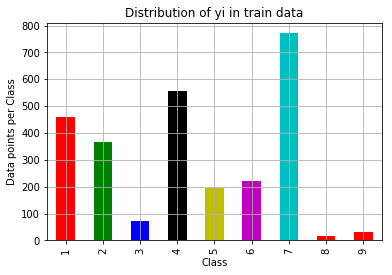

Number of data points in class 7 : 771 ( 28.715 %)
Number of data points in class 4 : 555 ( 20.67 %)
Number of data points in class 1 : 458 ( 17.058 %)
Number of data points in class 2 : 366 ( 13.631 %)
Number of data points in class 6 : 222 ( 8.268 %)
Number of data points in class 5 : 196 ( 7.3 %)
Number of data points in class 3 : 72 ( 2.682 %)
Number of data points in class 9 : 30 ( 1.117 %)
Number of data points in class 8 : 15 ( 0.559 %)
--------------------------------------------------------------------------------


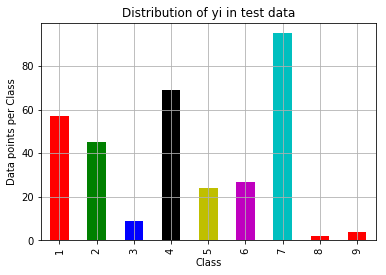

Number of data points in class 7 : 95 ( 28.614 %)
Number of data points in class 4 : 69 ( 20.783 %)
Number of data points in class 1 : 57 ( 17.169 %)
Number of data points in class 2 : 45 ( 13.554 %)
Number of data points in class 6 : 27 ( 8.133 %)
Number of data points in class 5 : 24 ( 7.229 %)
Number of data points in class 3 : 9 ( 2.711 %)
Number of data points in class 9 : 4 ( 1.205 %)
Number of data points in class 8 : 2 ( 0.602 %)
--------------------------------------------------------------------------------


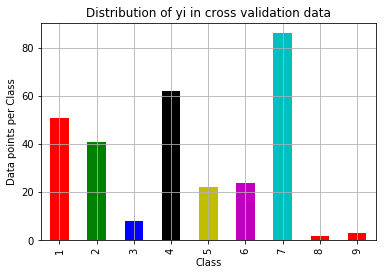

Number of data points in class 7 : 86 ( 28.763 %)
Number of data points in class 4 : 62 ( 20.736 %)
Number of data points in class 1 : 51 ( 17.057 %)
Number of data points in class 2 : 41 ( 13.712 %)
Number of data points in class 6 : 24 ( 8.027 %)
Number of data points in class 5 : 22 ( 7.358 %)
Number of data points in class 3 : 8 ( 2.676 %)
Number of data points in class 9 : 3 ( 1.003 %)
Number of data points in class 8 : 2 ( 0.669 %)


In [13]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = ['r','g','b','k','y','m','c']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = ['r','g','b','k','y','m','c']
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = ['r','g','b','k','y','m','c']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [4]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# Random Model 

Log loss on Cross Validation Data using Random Model 2.458923115251842
Log loss on Test Data using Random Model 2.5201938536322728
-------------------- Confusion matrix --------------------


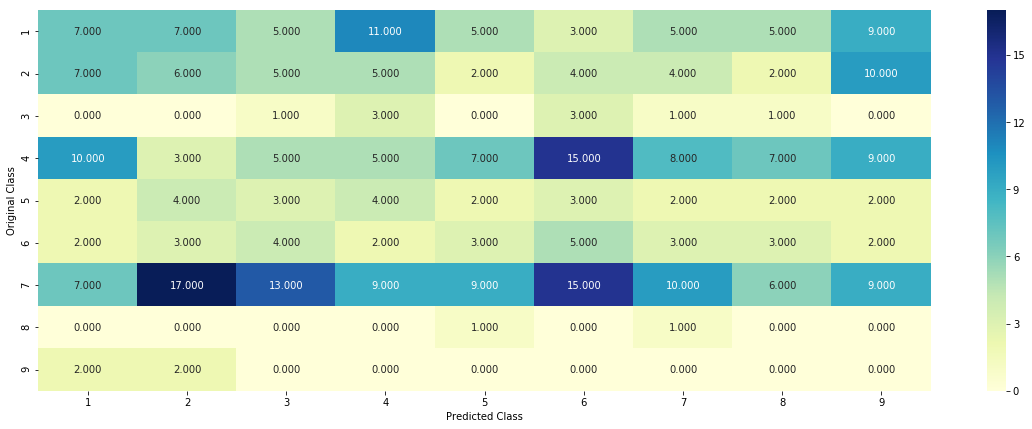

-------------------- Precision matrix (Columm Sum=1) --------------------


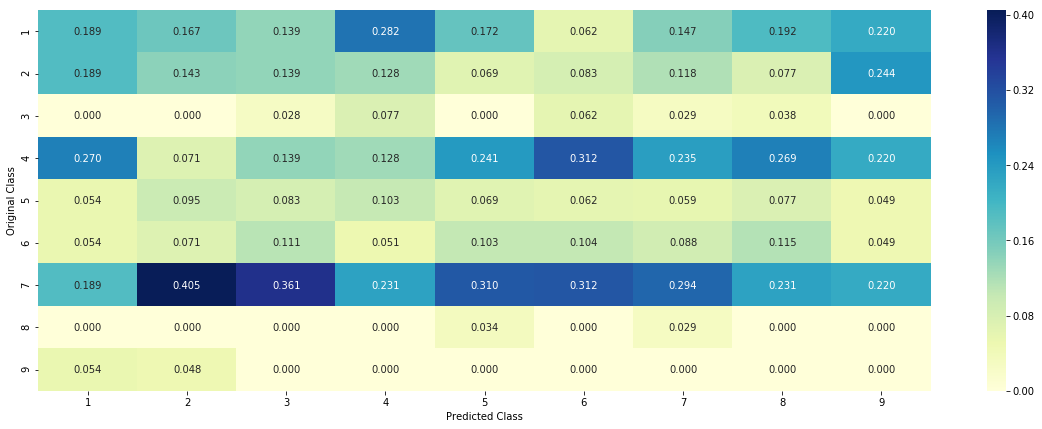

-------------------- Recall matrix (Row sum=1) --------------------


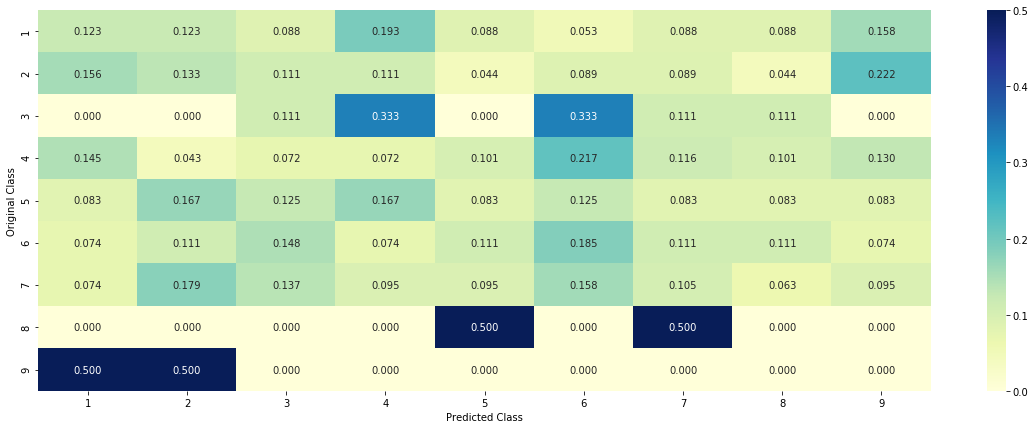

In [15]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [52]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [17]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head())

Number of Unique Genes : 242
BRCA1    205
TP53     131
EGFR     120
BRCA2    104
PTEN     100
Name: Gene, dtype: int64


In [18]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 242 different categories of genes in the train data, and they are distibuted as follows


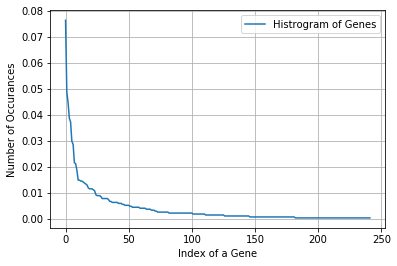

In [19]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


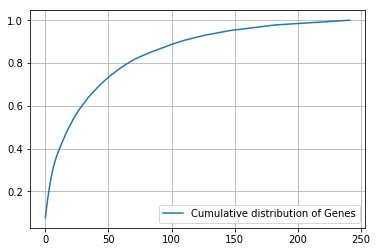

In [20]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [21]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [22]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2685, 9)


In [23]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [24]:
train_df['Gene'].head()

1844    IGF1R
1382    FGFR1
435      TP53
790     ERBB4
2564    BRCA1
Name: Gene, dtype: object

In [25]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2685, 241)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.347158797952598
For values of alpha =  0.0001 The log loss is: 1.1551003857178133
For values of alpha =  0.001 The log loss is: 1.1699333690114864
For values of alpha =  0.01 The log loss is: 1.2727413318621967
For values of alpha =  0.1 The log loss is: 1.383330284400659
For values of alpha =  1 The log loss is: 1.4207179560854684


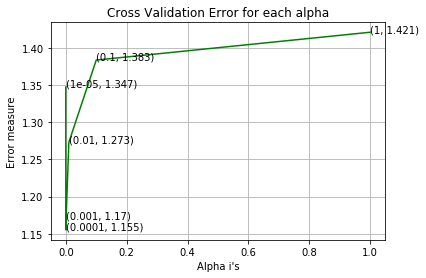

For values of best alpha =  0.0001 The train log loss is: 1.0430314183837515
For values of best alpha =  0.0001 The cross validation log loss is: 1.1551003857178133
For values of best alpha =  0.0001 The test log loss is: 1.174659523654137


In [26]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [27]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  242  genes in train dataset?
Ans
1. In test data 319 out of 332 : 96.08433734939759
2. In cross validation data 292 out of  299 : 97.65886287625418


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [28]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head())

Number of Unique Variations : 2432
Truncating_Mutations    78
Amplification           62
Deletion                56
Fusions                 24
Overexpression           3
Name: Variation, dtype: int64


In [29]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 2432 different categories of variations in the train data, and they are distibuted as follows


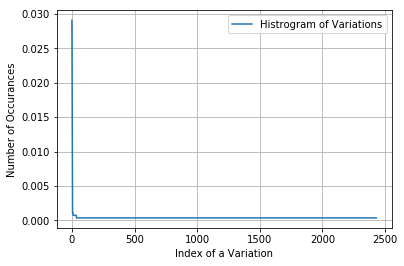

In [30]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02905028 0.05214153 0.07299814 ... 0.99925512 0.99962756 1.        ]


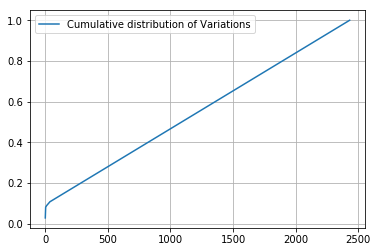

In [31]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [32]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [33]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2685, 9)


In [34]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [35]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2685, 2459)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.733297793611529
For values of alpha =  0.0001 The log loss is: 1.7210048653580992
For values of alpha =  0.001 The log loss is: 1.7150310796595896
For values of alpha =  0.01 The log loss is: 1.7164636751192879
For values of alpha =  0.1 The log loss is: 1.715637187160614
For values of alpha =  1 The log loss is: 1.7196166892958014


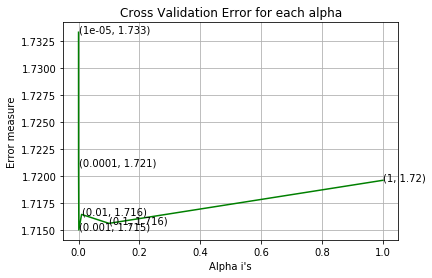

For values of best alpha =  0.001 The train log loss is: 1.1792167468170156
For values of best alpha =  0.001 The cross validation log loss is: 1.7150310796595896
For values of best alpha =  0.001 The test log loss is: 1.7337446778625274


In [36]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [37]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  2432  genes in test and cross validation data sets?
Ans
1. In test data 36 out of 332 : 10.843373493975903
2. In cross validation data 33 out of  299 : 11.036789297658862


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [38]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [39]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [40]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 59590


In [41]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [42]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [43]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [44]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [45]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [46]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({0.023358736199527518: 304, 0.040610341932026214: 226, 0.011524291623582192: 218, 0.0651623219123303: 195, 0.02791132416702239: 183, 0.014519740912112986: 175, 0.01720203667642448: 152, 0.426422781532246: 150, 0.027283270842512395: 135, 0.27857626614015796: 127, 0.06377668982626519: 121, 0.007804036200035076: 119, 0.017232881839032772: 117, 0.014990504696712443: 115, 0.052796464456467476: 114, 0.02921501285276264: 110, 0.06039825118475708: 106, 0.06035978803222383: 102, 0.06969269829048134: 100, 0.10201512160026248: 98, 0.03369877487576682: 94, 0.04915375626745367: 90, 0.02655728347688388: 90, 0.13541078523764014: 86, 0.026751749567192992: 85, 0.031100462772814003: 83, 0.020626160066514083: 83, 0.011858275136348826: 82, 0.012265745936659307: 79, 0.01090541622371993: 79, 0.03975109576976775: 78, 0.017743491537489303: 77, 0.03800391399078971: 76, 0.017906455903618366: 76, 0.018985768785528528: 74, 0.011365421079194402: 71, 0.03679026844032856: 70, 0.05386496660702504: 69, 0.04456

For values of alpha =  1e-05 The log loss is: 1.2843831562730823
For values of alpha =  0.0001 The log loss is: 1.2914105036875287
For values of alpha =  0.001 The log loss is: 1.3489023041557044
For values of alpha =  0.01 The log loss is: 1.5087352344126566
For values of alpha =  0.1 The log loss is: 1.487089090170422
For values of alpha =  1 The log loss is: 1.9747571641122312


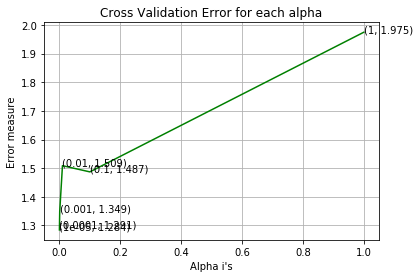

For values of best alpha =  1e-05 The train log loss is: 1.096440185699733
For values of best alpha =  1e-05 The cross validation log loss is: 1.2843831562730823
For values of best alpha =  1e-05 The test log loss is: 1.276932899779852


In [47]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [48]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [49]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

99.745 % of word of test data appeared in train data
99.572 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [53]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [54]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [52]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [53]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [54]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2685, 62290)
(number of data points * number of features) in test data =  (332, 62290)
(number of data points * number of features) in cross validation data = (299, 62290)


In [57]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2685, 27)
(number of data points * number of features) in test data =  (332, 27)
(number of data points * number of features) in cross validation data = (299, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.1869800739366914
for alpha = 0.0001
Log Loss : 1.195429255328209
for alpha = 0.001
Log Loss : 1.1902687829341285
for alpha = 0.1
Log Loss : 1.208036856929492
for alpha = 1
Log Loss : 1.2664093574753434
for alpha = 10
Log Loss : 1.3728884117560634
for alpha = 100
Log Loss : 1.4453138106312273
for alpha = 1000
Log Loss : 1.4468879952057678


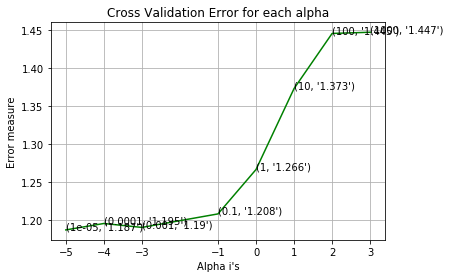

For values of best alpha =  1e-05 The train log loss is: 0.803744615111424
For values of best alpha =  1e-05 The cross validation log loss is: 1.1869800739366914
For values of best alpha =  1e-05 The test log loss is: 1.268844080280906


In [58]:

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(test_y, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.268844080280906
Number of missclassified point : 0.44816053511705684
-------------------- Confusion matrix --------------------


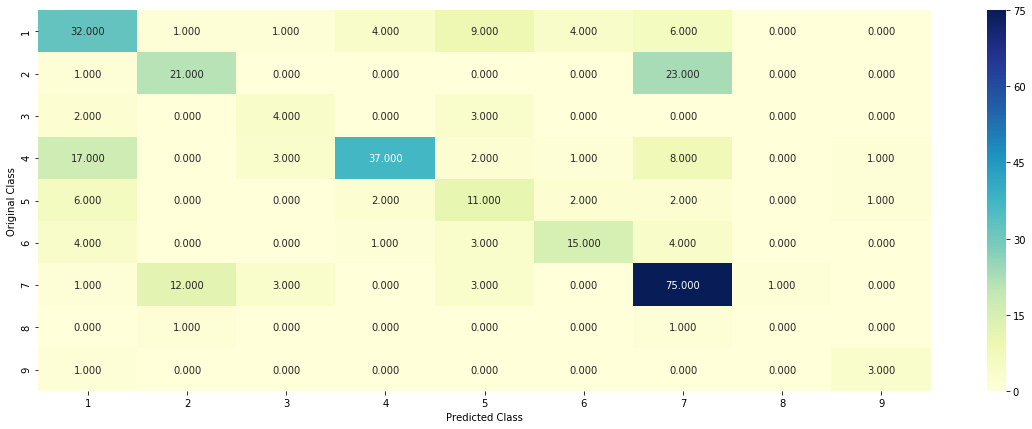

-------------------- Precision matrix (Columm Sum=1) --------------------


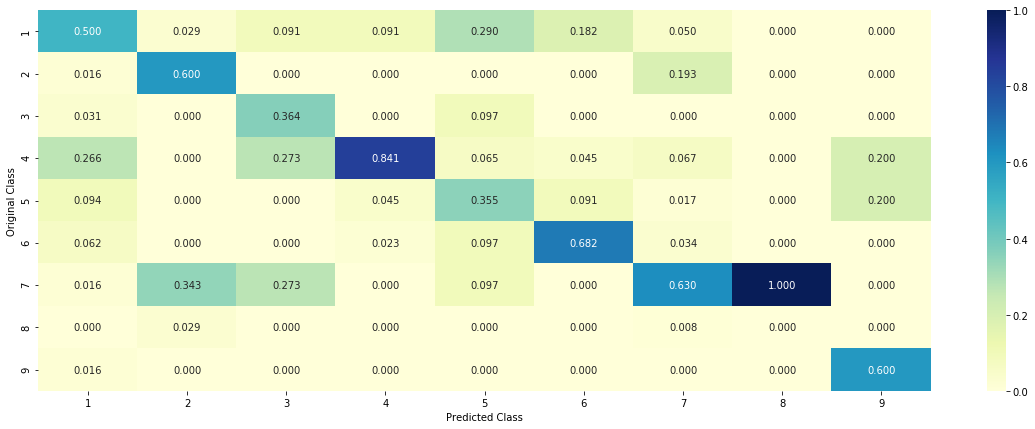

-------------------- Recall matrix (Row sum=1) --------------------


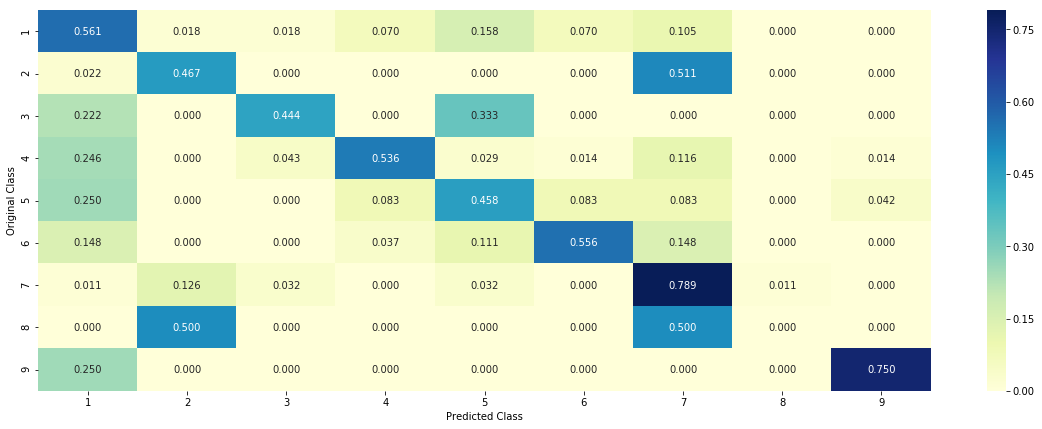

In [59]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(test_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_x_onehotCoding)- test_y))/cv_y.shape[0])
plot_confusion_matrix(test_y, sig_clf.predict(test_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [60]:
test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5953 0.0924 0.0104 0.1057 0.0399 0.0399 0.1087 0.0044 0.0033]]
Actual Class : 1
--------------------------------------------------
13 Text feature [type] present in test data point [True]
14 Text feature [protein] present in test data point [True]
17 Text feature [dna] present in test data point [True]
18 Text feature [one] present in test data point [True]
19 Text feature [wild] present in test data point [True]
20 Text feature [two] present in test data point [True]
21 Text feature [therefore] present in test data point [True]
22 Text feature [region] present in test data point [True]
23 Text feature [binding] present in test data point [True]
24 Text feature [containing] present in test data point [True]
25 Text feature [function] present in test data point [True]
26 Text feature [results] present in test data point [True]
27 Text feature [also] present in test data point [True]
28 Text feature [either] present in test data poin

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [61]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0865 0.0884 0.0099 0.1012 0.0382 0.0381 0.6304 0.0042 0.0031]]
Actual Class : 6
--------------------------------------------------
16 Text feature [cells] present in test data point [True]
19 Text feature [contrast] present in test data point [True]
20 Text feature [downstream] present in test data point [True]
21 Text feature [cell] present in test data point [True]
22 Text feature [activated] present in test data point [True]
23 Text feature [presence] present in test data point [True]
24 Text feature [activation] present in test data point [True]
25 Text feature [factor] present in test data point [True]
26 Text feature [expressing] present in test data point [True]
29 Text feature [phosphorylation] present in test data point [True]
30 Text feature [shown] present in test data point [True]
31 Text feature [also] present in test data point [True]
32 Text feature [inhibitor] present in test data point [True]
33 Text feature [recen

<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0777176138434064
for alpha = 11
Log Loss : 1.0600726696285265
for alpha = 15
Log Loss : 1.0521960656222626
for alpha = 21
Log Loss : 1.0456988774281692
for alpha = 31
Log Loss : 1.0340724962441843
for alpha = 41
Log Loss : 1.0374622051236004
for alpha = 51
Log Loss : 1.031069403210575
for alpha = 99
Log Loss : 1.0476210493026608


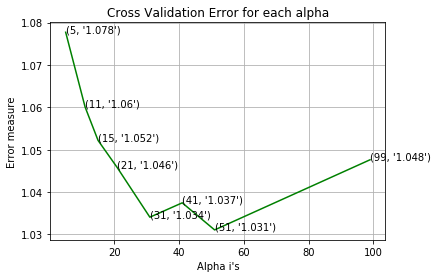

For values of best alpha =  51 The train log loss is: 0.8889106655642733
For values of best alpha =  51 The cross validation log loss is: 1.031069403210575
For values of best alpha =  51 The test log loss is: 1.0363074741824614


In [62]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0363074741824614
Number of mis-classified points : 0.3704819277108434
-------------------- Confusion matrix --------------------


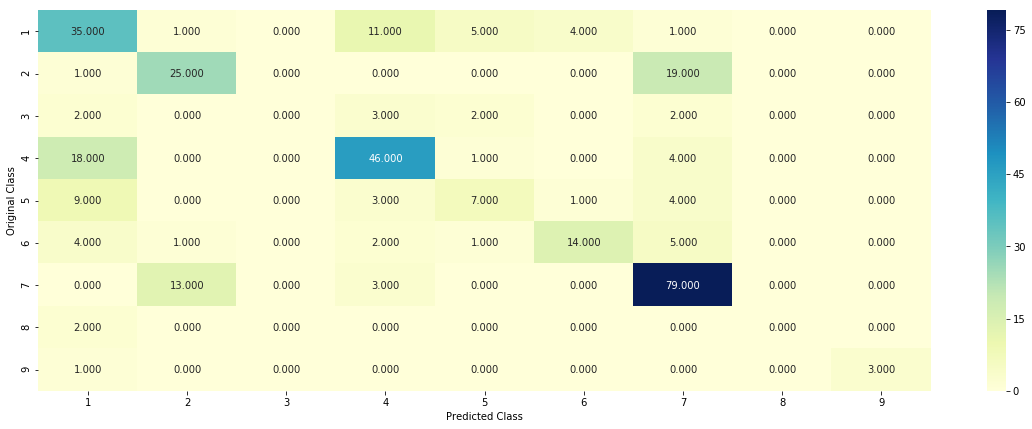

-------------------- Precision matrix (Columm Sum=1) --------------------


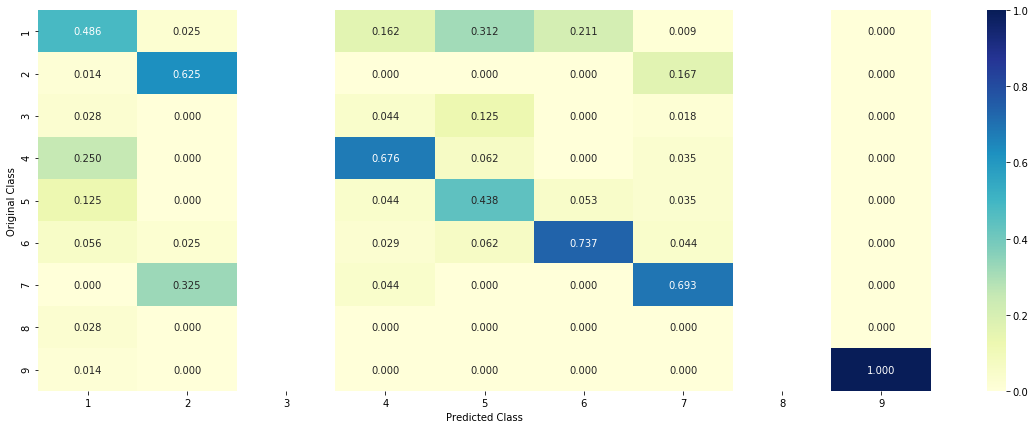

-------------------- Recall matrix (Row sum=1) --------------------


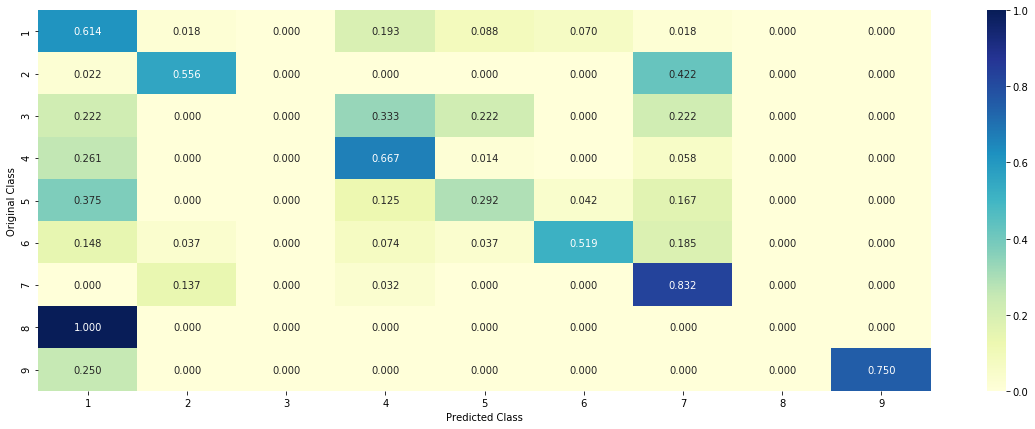

In [63]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, test_x_responseCoding, test_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [64]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 6
The  51  nearest neighbours of the test points belongs to classes [2 2 2 7 2 7 2 2 6 2 6 7 7 2 7 7 2 7 2 7 7 7 7 7 2 2 2 6 7 7 7 6 7 2 7 7 7
 2 6 7 7 2 6 7 7 7 7 6 7 7 2]
Fequency of nearest points : Counter({7: 27, 2: 17, 6: 7})


<h3>4.2.4. Sample Query Point-2 </h3>

In [65]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 2
the k value for knn is 51 and the nearest neighbours of the test points belongs to classes [2 2 2 2 7 7 7 7 7 7 2 2 2 5 6 7 2 2 2 7 2 2 7 7 7 2 2 7 7 2 7 7 2 2 7 2 6
 7 2 2 2 2 7 7 7 2 2 2 6 7 7]
Fequency of nearest points : Counter({2: 25, 7: 22, 6: 3, 5: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3075014424113787
for alpha = 1e-05
Log Loss : 1.287537388229879
for alpha = 0.0001
Log Loss : 1.2258494390799048
for alpha = 0.001
Log Loss : 1.1803042618702393
for alpha = 0.01
Log Loss : 1.2324545278608128
for alpha = 0.1
Log Loss : 1.2797100396286532
for alpha = 1
Log Loss : 1.588787446330437
for alpha = 10
Log Loss : 1.6486414401494798
for alpha = 100
Log Loss : 1.6556672794898277


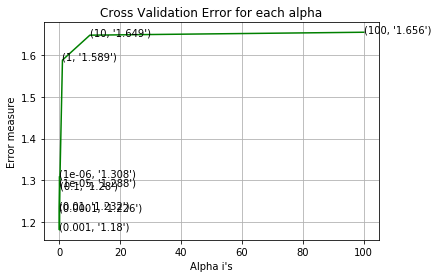

For values of best alpha =  0.001 The train log loss is: 0.5489899440923632
For values of best alpha =  0.001 The cross validation log loss is: 1.1803042618702393
For values of best alpha =  0.001 The test log loss is: 1.2462855330969764


In [66]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.2462855330969764
Number of mis-classified points : 0.3463855421686747
-------------------- Confusion matrix --------------------


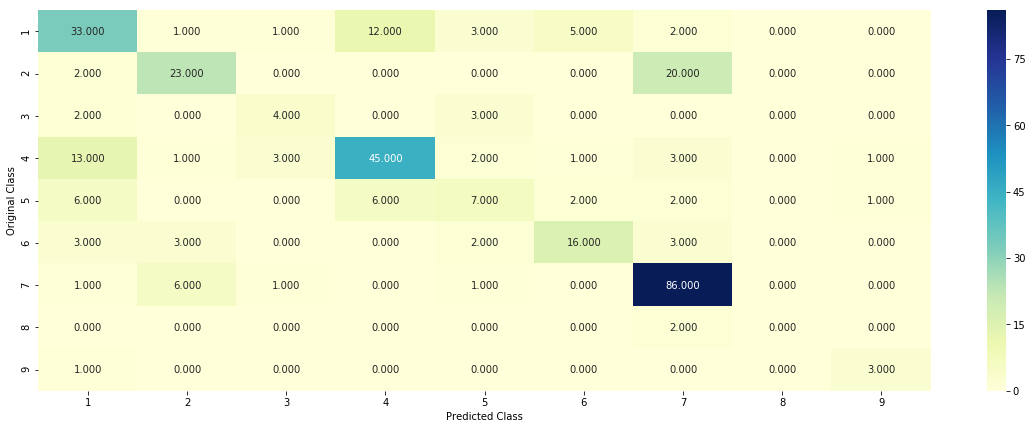

-------------------- Precision matrix (Columm Sum=1) --------------------


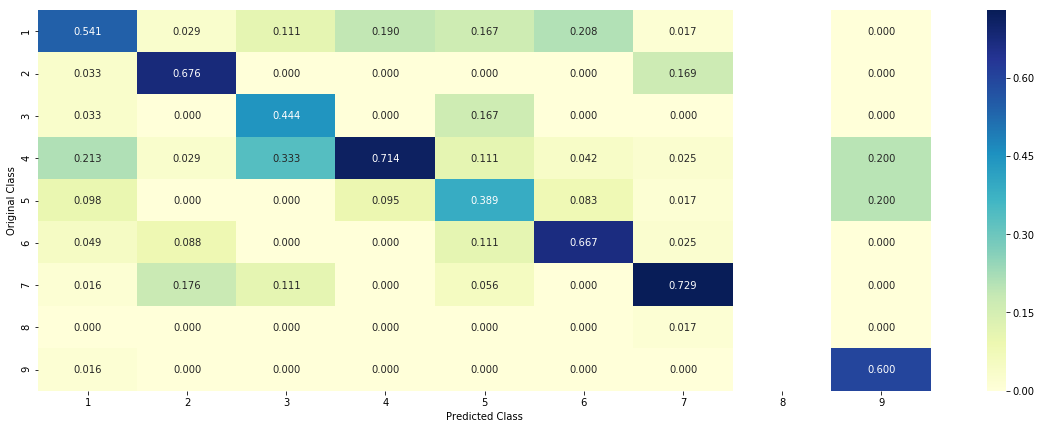

-------------------- Recall matrix (Row sum=1) --------------------


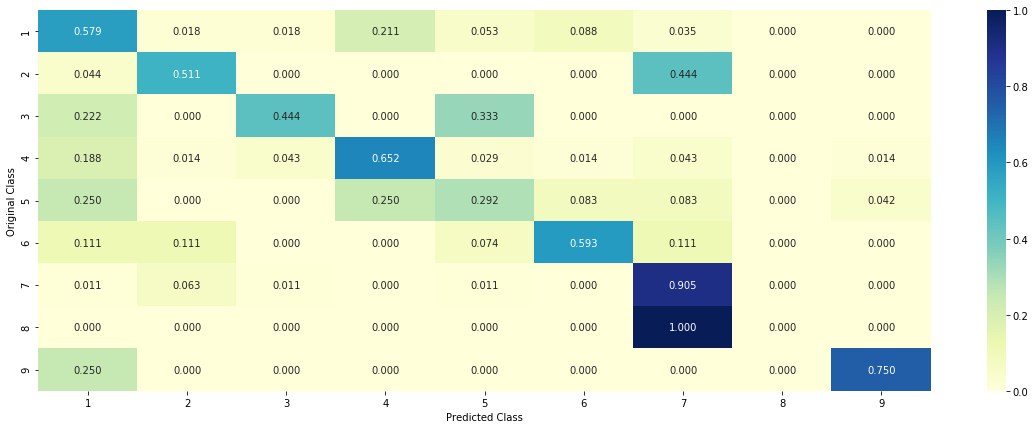

In [67]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [68]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [69]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.8822 0.015  0.0027 0.0544 0.0108 0.0099 0.0179 0.0049 0.0021]]
Actual Class : 1
--------------------------------------------------
151 Text feature [abrogating] present in test data point [True]
381 Text feature [patches] present in test data point [True]
475 Text feature [aggregation] present in test data point [True]
479 Text feature [dissect] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [70]:
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0389 0.1444 0.0034 0.125  0.0118 0.0088 0.6426 0.0181 0.007 ]]
Actual Class : 6
--------------------------------------------------
23 Text feature [constitutive] present in test data point [True]
33 Text feature [activated] present in test data point [True]
44 Text feature [oncogene] present in test data point [True]
55 Text feature [activation] present in test data point [True]
59 Text feature [serum] present in test data point [True]
70 Text feature [infect] present in test data point [True]
86 Text feature [murine] present in test data point [True]
93 Text feature [downstream] present in test data point [True]
141 Text feature [expressing] present in test data point [True]
167 Text feature [transformation] present in test data point [True]
203 Text feature [upstate] present in test data point [True]
230 Text feature [overexpression] present in test data point [True]
239 Text feature [carcinogens] present in test data point [True

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3146565024466141
for alpha = 1e-05
Log Loss : 1.2843754690232414
for alpha = 0.0001
Log Loss : 1.2963023374409555
for alpha = 0.001
Log Loss : 1.3316285934304979
for alpha = 0.01
Log Loss : 1.4677489304813407
for alpha = 0.1
Log Loss : 1.3802908248322805
for alpha = 1
Log Loss : 1.807187981622904


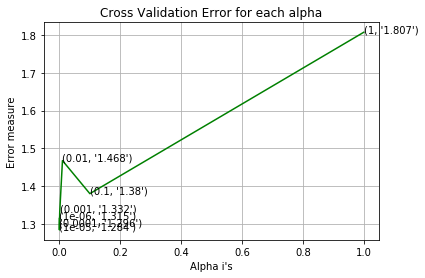

For values of best alpha =  1e-05 The train log loss is: 0.9496862531399917
For values of best alpha =  1e-05 The cross validation log loss is: 1.2843754690232414
For values of best alpha =  1e-05 The test log loss is: 1.2902587561902432


In [71]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.2902587561902432
Number of mis-classified points : 0.3825301204819277
-------------------- Confusion matrix --------------------


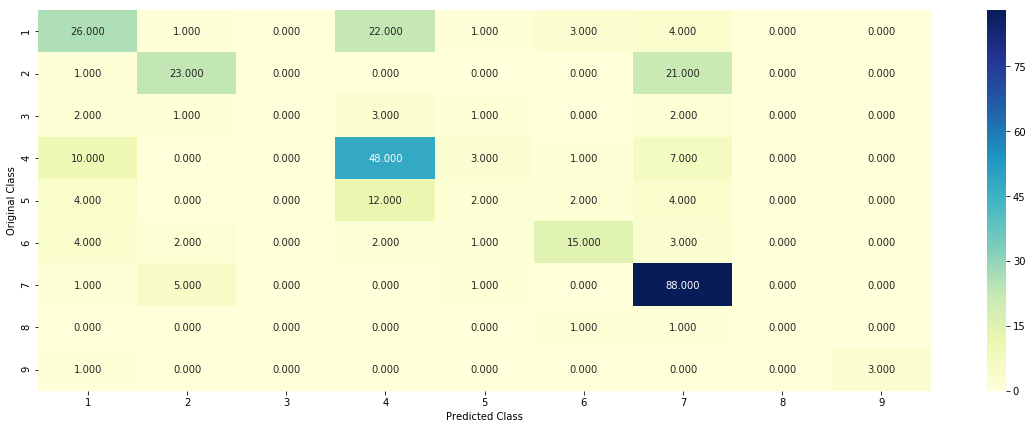

-------------------- Precision matrix (Columm Sum=1) --------------------


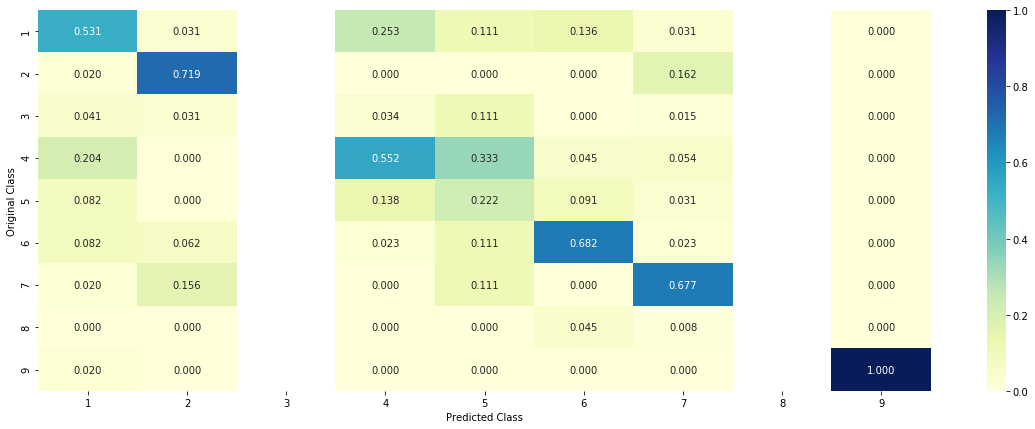

-------------------- Recall matrix (Row sum=1) --------------------


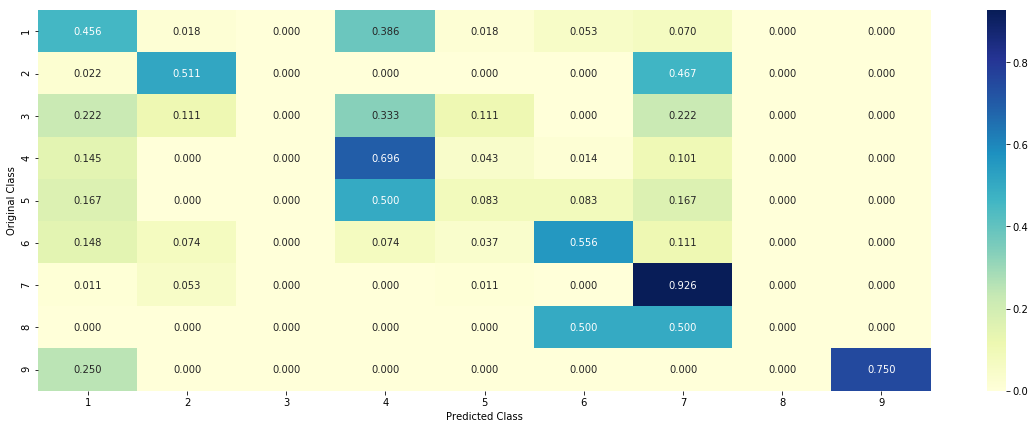

In [72]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [73]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5311 0.0673 0.0128 0.0566 0.0368 0.0342 0.2522 0.0044 0.0046]]
Actual Class : 1
--------------------------------------------------
181 Text feature [abrogating] present in test data point [True]
234 Text feature [dissect] present in test data point [True]
407 Text feature [relaxation] present in test data point [True]
465 Text feature [e180k] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [74]:
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0391 0.1148 0.0147 0.3106 0.034  0.0156 0.4585 0.0069 0.0058]]
Actual Class : 6
--------------------------------------------------
262 Text feature [overexpression] present in test data point [True]
299 Text feature [yokoyama] present in test data point [True]
367 Text feature [constitutive] present in test data point [True]
393 Text feature [lohuizen] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.3161793801065458
for C = 0.0001
Log Loss : 1.2925772977933945
for C = 0.001
Log Loss : 1.1533476597853183
for C = 0.01
Log Loss : 1.1846779621683081
for C = 0.1
Log Loss : 1.3753631412530778
for C = 1
Log Loss : 1.6578339802639854
for C = 10
Log Loss : 1.6572437784165381
for C = 100
Log Loss : 1.657244040133885


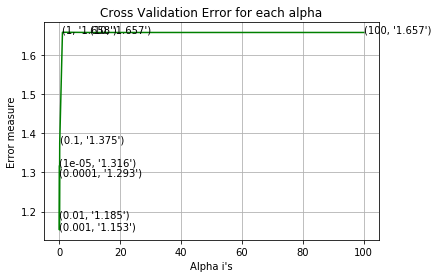

For values of best alpha =  0.001 The train log loss is: 0.7635611796596208
For values of best alpha =  0.001 The cross validation log loss is: 1.1533476597853183
For values of best alpha =  0.001 The test log loss is: 1.262505611823395


In [75]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.262505611823395
Number of mis-classified points : 0.3644578313253012
-------------------- Confusion matrix --------------------


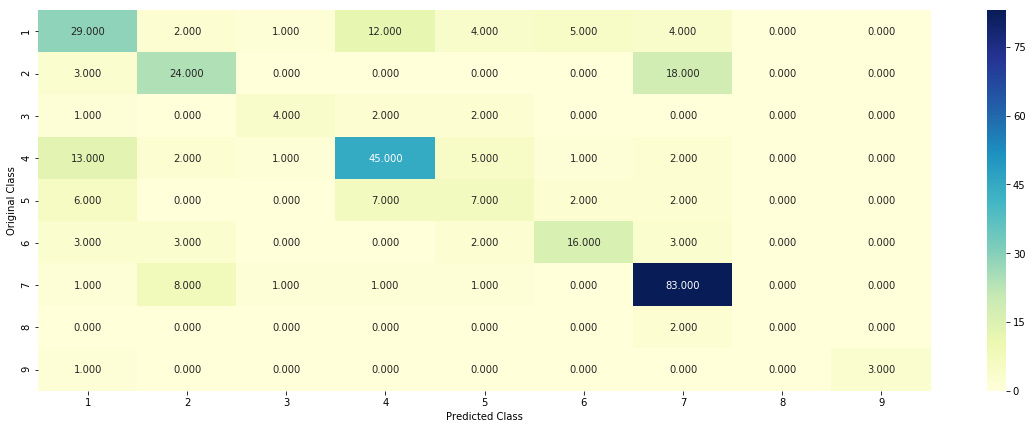

-------------------- Precision matrix (Columm Sum=1) --------------------


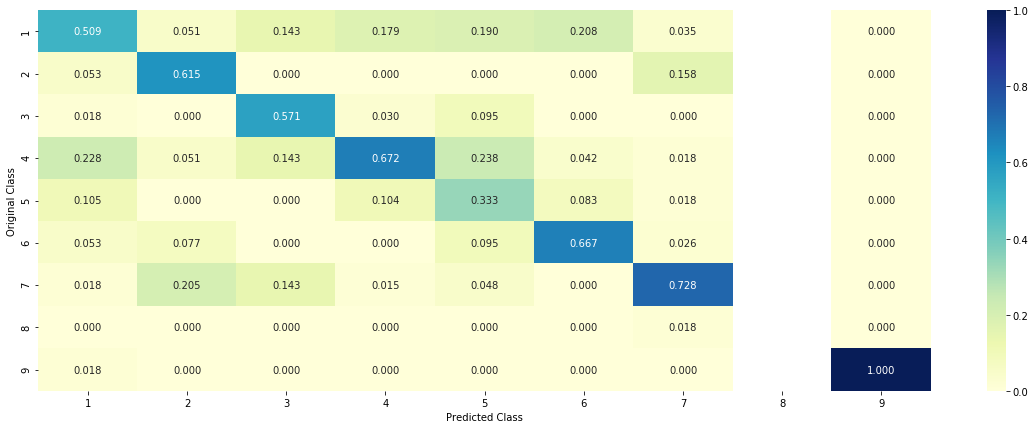

-------------------- Recall matrix (Row sum=1) --------------------


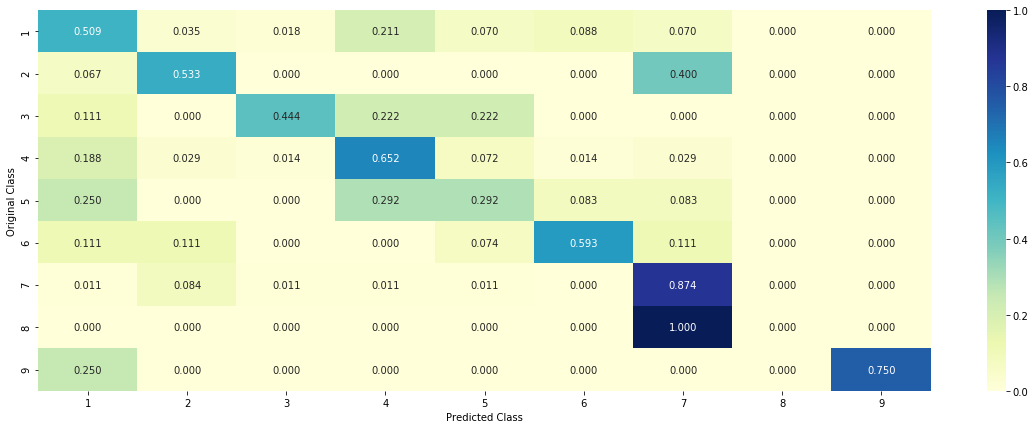

In [76]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,test_x_onehotCoding,test_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [77]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 10
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.6766 0.0699 0.0114 0.0881 0.0391 0.0296 0.0765 0.0054 0.0035]]
Actual Class : 1
--------------------------------------------------
118 Text feature [dissect] present in test data point [True]
205 Text feature [abrogating] present in test data point [True]
233 Text feature [patches] present in test data point [True]
258 Text feature [relaxation] present in test data point [True]
481 Text feature [interfaces] present in test data point [True]
Out of the top  500  features  5 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [78]:
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0518 0.1147 0.0108 0.1547 0.035  0.0105 0.6083 0.0072 0.0067]]
Actual Class : 6
--------------------------------------------------
130 Text feature [constitutive] present in test data point [True]
249 Text feature [oncogene] present in test data point [True]
255 Text feature [expressing] present in test data point [True]
258 Text feature [activated] present in test data point [True]
262 Text feature [transformation] present in test data point [True]
285 Text feature [activation] present in test data point [True]
290 Text feature [overexpression] present in test data point [True]
387 Text feature [3b] present in test data point [True]
441 Text feature [phospho] present in test data point [True]
475 Text feature [scf] present in test data point [True]
487 Text feature [phosphorylation] present in test data point [True]
Out of the top  500  features  11 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

for n_estimators = 100 and max depth =  5
Log Loss : 1.2738375452299613
for n_estimators = 100 and max depth =  10
Log Loss : 1.2254706667070505
for n_estimators = 200 and max depth =  5
Log Loss : 1.2760294535952117
for n_estimators = 200 and max depth =  10
Log Loss : 1.2219671414102564
for n_estimators = 500 and max depth =  5
Log Loss : 1.2695504508379747
for n_estimators = 500 and max depth =  10
Log Loss : 1.2110878438355417
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2678213401986007
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2069497932057465
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2625460405184878
for n_estimators = 2000 and max depth =  10
Log Loss : 1.207418480415302


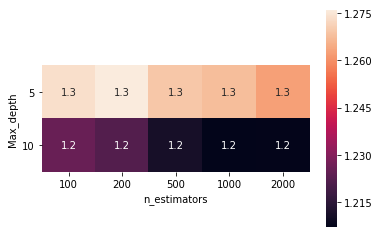

For values of best estimator =  1000 The train log loss is: 0.6696981171487834
For values of best estimator =  1000 The cross validation log loss is: 1.2069497932057465
For values of best estimator =  1000 The test log loss is: 1.1685913919703608


In [79]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
data = pd.DataFrame(np.array(cv_log_error_array).reshape(5,2), columns=max_depth, index = alpha)
# plot heatmap
ax = sns.heatmap(data.T,annot=True,square=True)
# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)
for item in ax.get_xticklabels():
    item.set_rotation(0)
# save figure
plt.ylabel('Max_depth')
plt.xlabel('n_estimators')
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.168591391970361
Number of mis-classified points : 0.37650602409638556
-------------------- Confusion matrix --------------------


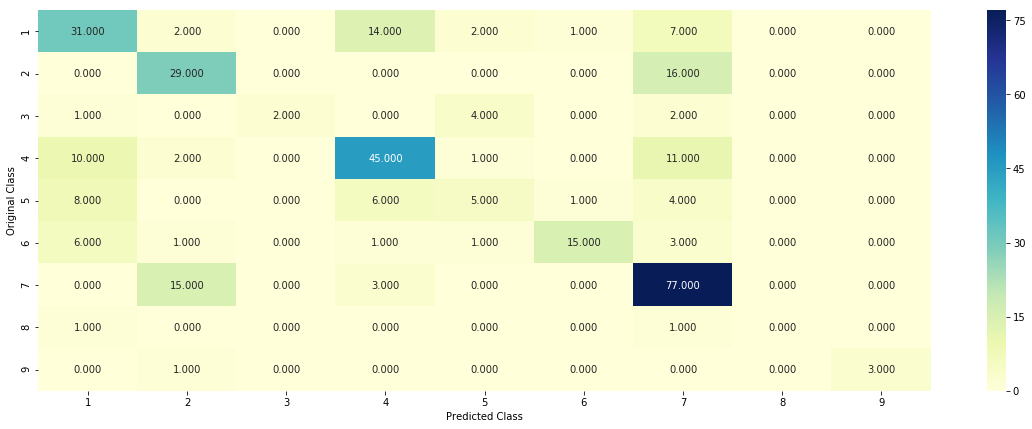

-------------------- Precision matrix (Columm Sum=1) --------------------


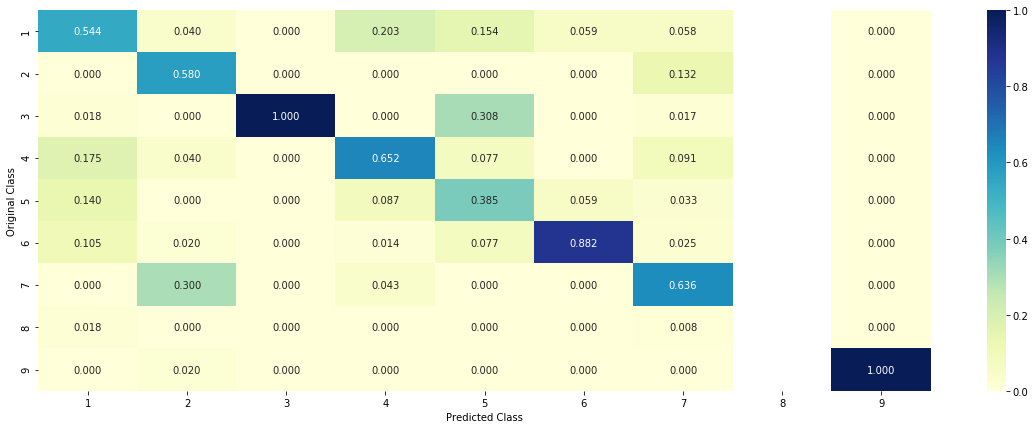

-------------------- Recall matrix (Row sum=1) --------------------


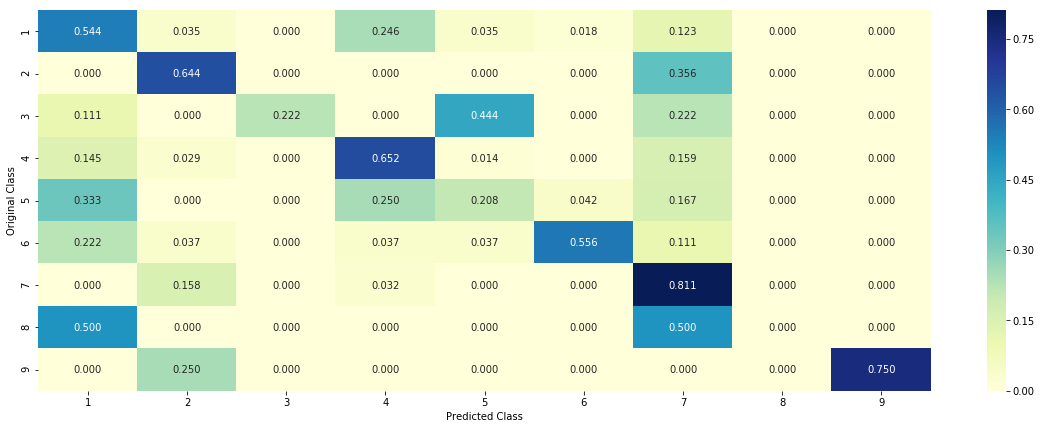

In [80]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,test_x_onehotCoding,test_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [81]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.3816 0.0648 0.0173 0.3197 0.0583 0.0535 0.0916 0.0059 0.0074]]
Actual Class : 1
--------------------------------------------------
1 Text feature [activation] present in test data point [True]
4 Text feature [inhibitor] present in test data point [True]
5 Text feature [activating] present in test data point [True]
7 Text feature [treatment] present in test data point [True]
10 Text feature [suppressor] present in test data point [True]
15 Text feature [treated] present in test data point [True]
21 Text feature [inhibition] present in test data point [True]
22 Text feature [function] present in test data point [True]
25 Text feature [inhibited] present in test data point [True]
29 Text feature [yeast] present in test data point [True]
33 Text feature [cells] present in test data point [True]
34 Text feature [activated] present in test data point [True]
39 Text feature [signaling] present in test data point [True]
45 Text feature [ex

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [82]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.2364 0.158  0.0211 0.2358 0.0652 0.0618 0.1983 0.0087 0.0148]]
Actuall Class : 6
--------------------------------------------------
1 Text feature [activation] present in test data point [True]
3 Text feature [constitutive] present in test data point [True]
4 Text feature [inhibitor] present in test data point [True]
5 Text feature [activating] present in test data point [True]
6 Text feature [oncogenic] present in test data point [True]
7 Text feature [treatment] present in test data point [True]
8 Text feature [inhibitors] present in test data point [True]
11 Text feature [phosphorylation] present in test data point [True]
12 Text feature [loss] present in test data point [True]
15 Text feature [treated] present in test data point [True]
16 Text feature [therapy] present in test data point [True]
17 Text feature [growth] present in test data point [True]
20 Text feature [months] present in test data point [True]
21 Text feature [

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

for n_estimators = 10 and max depth =  2
Log Loss : 2.0765996310856862
for n_estimators = 10 and max depth =  3
Log Loss : 1.7237799870138837
for n_estimators = 10 and max depth =  5
Log Loss : 1.4385964381215373
for n_estimators = 10 and max depth =  10
Log Loss : 2.1317462358205415
for n_estimators = 50 and max depth =  2
Log Loss : 1.6772981390967274
for n_estimators = 50 and max depth =  3
Log Loss : 1.408995964218167
for n_estimators = 50 and max depth =  5
Log Loss : 1.2781458303958988
for n_estimators = 50 and max depth =  10
Log Loss : 1.7573430142043749
for n_estimators = 100 and max depth =  2
Log Loss : 1.5328674198438832
for n_estimators = 100 and max depth =  3
Log Loss : 1.4614273742636885
for n_estimators = 100 and max depth =  5
Log Loss : 1.2628714282328368
for n_estimators = 100 and max depth =  10
Log Loss : 1.7682799643067784
for n_estimators = 200 and max depth =  2
Log Loss : 1.567228252857327
for n_estimators = 200 and max depth =  3
Log Loss : 1.466977046927435


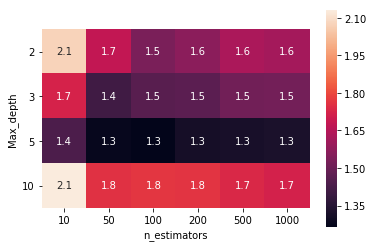

For values of best alpha =  100 The train log loss is: 0.055389739406110555
For values of best alpha =  100 The cross validation log loss is: 1.2628714282328368
For values of best alpha =  100 The test log loss is: 1.2761617656504074


In [83]:

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
data = pd.DataFrame(np.array(cv_log_error_array).reshape(6,4), columns=max_depth, index = alpha)
# plot heatmap
ax = sns.heatmap(data.T,annot=True,square=True)
# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)
for item in ax.get_xticklabels():
    item.set_rotation(0)
# save figure
plt.ylabel('Max_depth')
plt.xlabel('n_estimators')
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.2761617656504074
Number of mis-classified points : 0.4367469879518072
-------------------- Confusion matrix --------------------


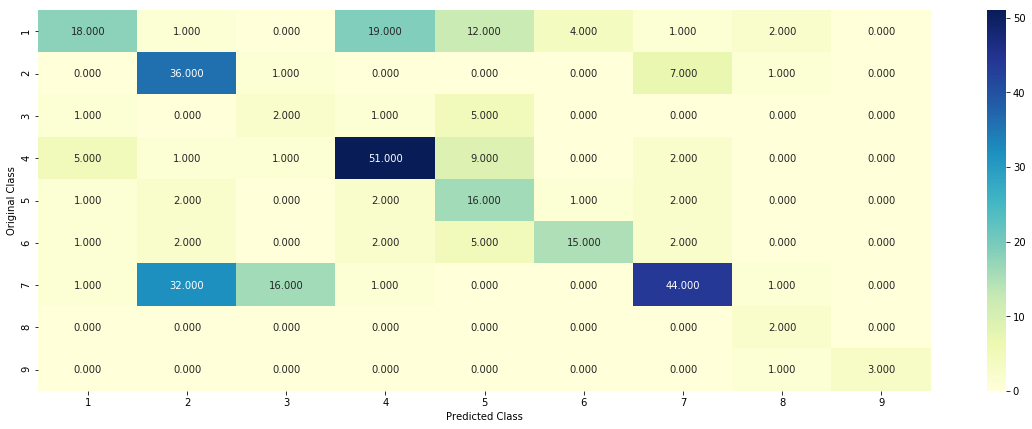

-------------------- Precision matrix (Columm Sum=1) --------------------


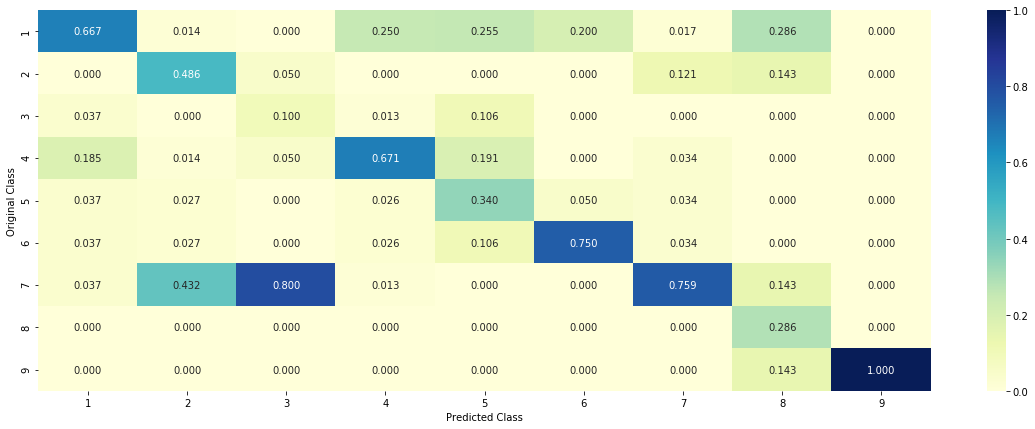

-------------------- Recall matrix (Row sum=1) --------------------


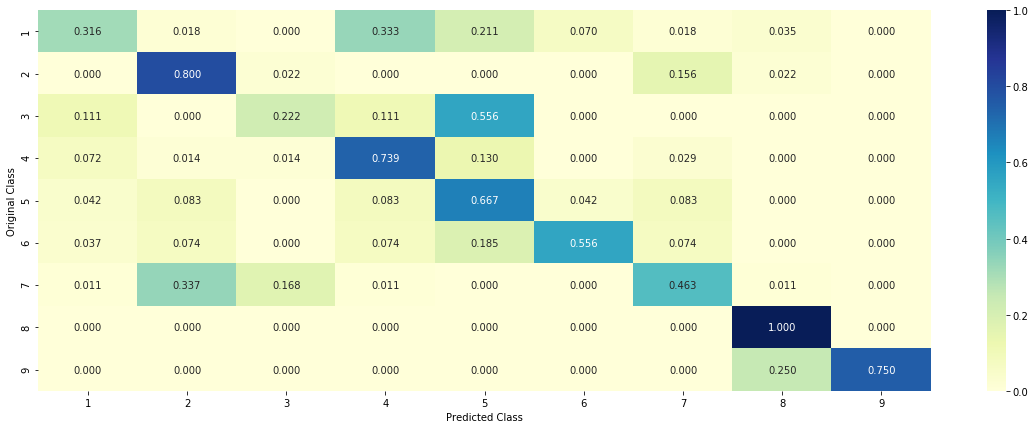

In [84]:
clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,test_x_responseCoding,test_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [85]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 15
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 7
Predicted Class Probabilities: [[0.0128 0.3224 0.1363 0.0175 0.0275 0.0429 0.4015 0.0286 0.0105]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [86]:
test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0038 0.9074 0.0027 0.0068 0.0018 0.0151 0.045  0.0125 0.0048]]
Actual Class : 6
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [87]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.01, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.1)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.001,0.01,0.09,0.1,0.2,0.5,1] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.18
Support vector machines : Log Loss: 1.19
Naive Bayes : Log Loss: 1.21
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.949
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.324
Stacking Classifer : for the value of alpha: 0.090000 Log Loss: 1.086
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.088
Stacking Classifer : for the value of alpha: 0.200000 Log Loss: 1.116
Stacking Classifer : for the value of alpha: 0.500000 Log Loss: 1.181
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.241


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.5740077907870512
Log loss (CV) on the stacking classifier : 1.0878515031930824
Log loss (test) on the stacking classifier : 1.1299491735906018
Number of missclassified point : 0.3493975903614458
-------------------- Confusion matrix --------------------


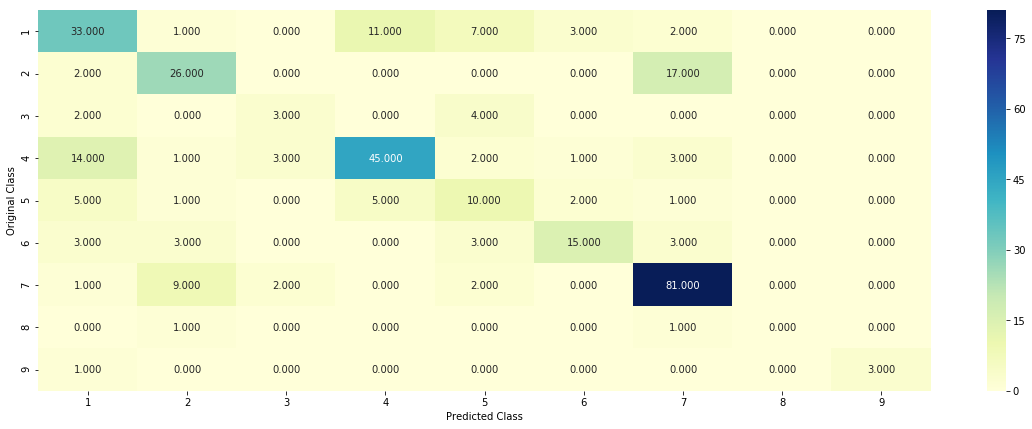

-------------------- Precision matrix (Columm Sum=1) --------------------


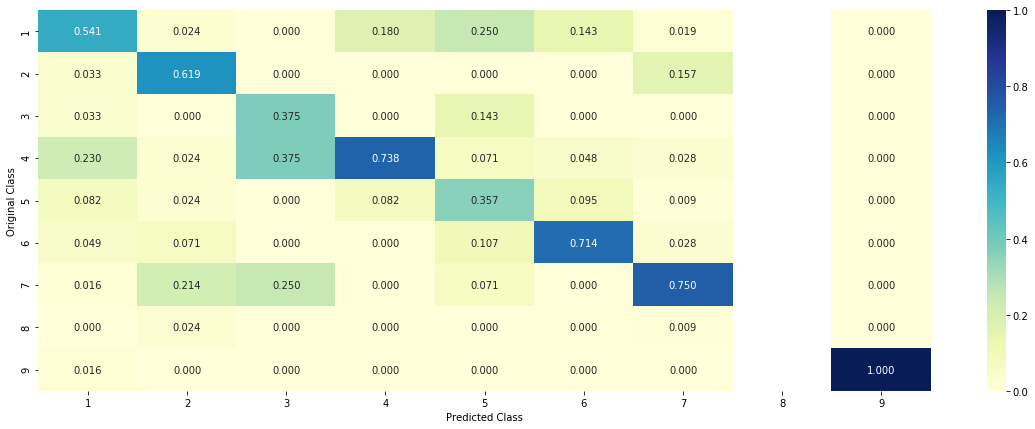

-------------------- Recall matrix (Row sum=1) --------------------


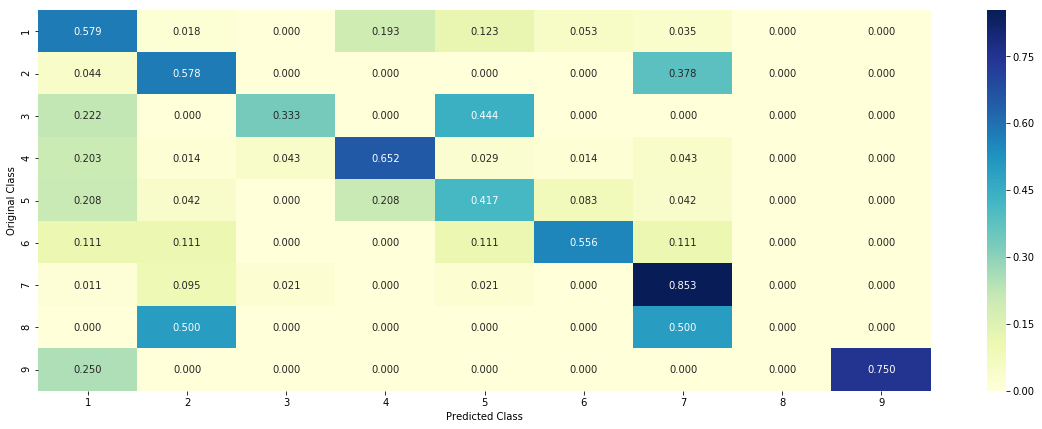

In [88]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.6888059039725092
Log loss (CV) on the VotingClassifier : 1.0385097032211283
Log loss (test) on the VotingClassifier : 1.1007338086998733
Number of missclassified point : 0.3644578313253012
-------------------- Confusion matrix --------------------


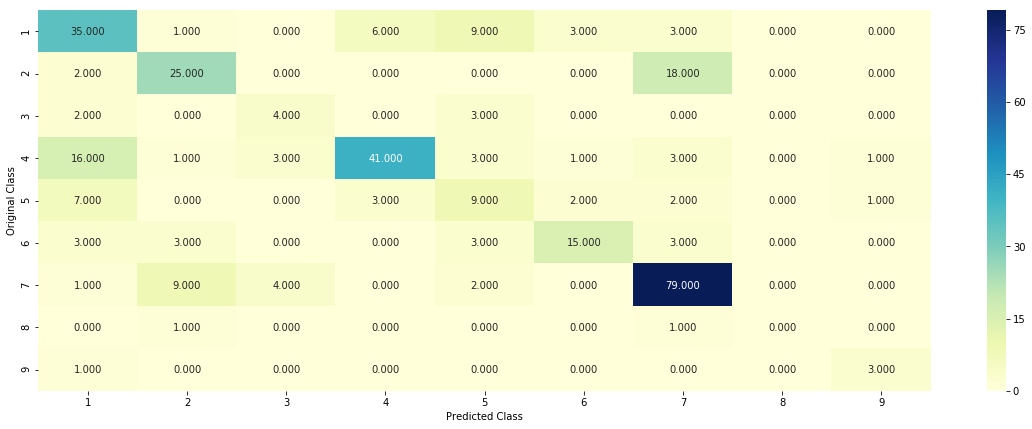

-------------------- Precision matrix (Columm Sum=1) --------------------


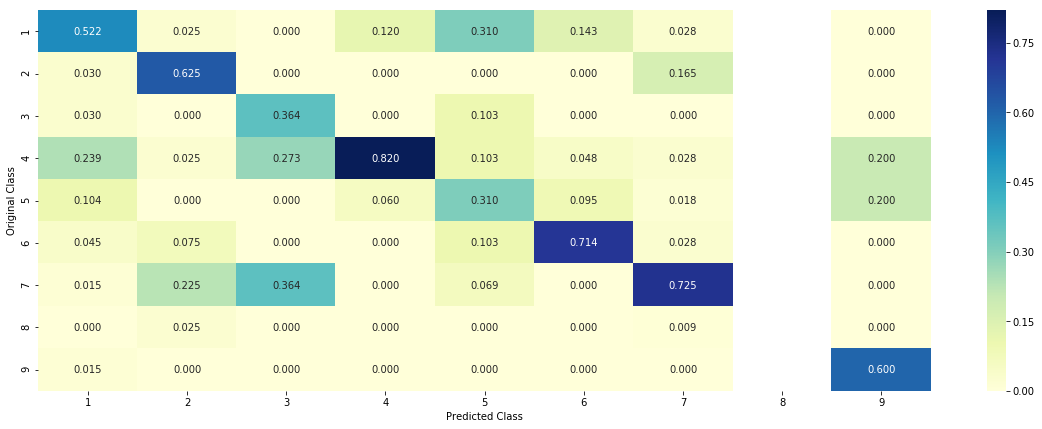

-------------------- Recall matrix (Row sum=1) --------------------


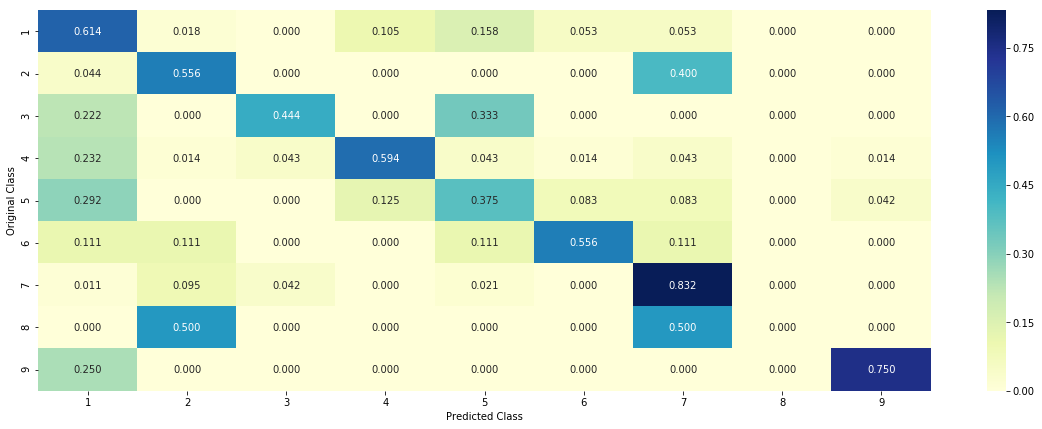

In [89]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

In [90]:
del test_x_onehotCoding,cv_x_onehotCoding,train_x_onehotCoding


# Tfidf with 1000 max features

In [91]:
# one-hot encoding of Gene feature.
gene_tfidf_vectorizer = TfidfVectorizer()
train_gene_feature_tfidf_onehotCoding = gene_tfidf_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_tfidf_onehotCoding = gene_tfidf_vectorizer.transform(test_df['Gene'])
cv_gene_feature_tfidf_onehotCoding = gene_tfidf_vectorizer.transform(cv_df['Gene'])

# one-hot encoding of variation feature.
variation_tfidf_vectorizer = TfidfVectorizer()
train_variation_feature_tfidf_onehotCoding = variation_tfidf_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_tfidf_onehotCoding = variation_tfidf_vectorizer.transform(test_df['Variation'])
cv_variation_feature_tfidf_onehotCoding = variation_tfidf_vectorizer.transform(cv_df['Variation'])



In [92]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_tfidf_vectorizer = TfidfVectorizer(max_features = 1000)
train_text_feature_tfidf_onehotCoding = text_tfidf_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_tfidf_features= text_tfidf_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_tfidf_fea_counts = train_text_feature_tfidf_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_tfidf_fea_dict = dict(zip(list(train_text_tfidf_features),train_text_tfidf_fea_counts))


print("Total number of unique words in train data :", len(train_text_tfidf_features))

Total number of unique words in train data : 1000


In [93]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_tfidf_fea_dict = dict(sorted(text_tfidf_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_tfidf_fea_dict.values()))

In [94]:
# don't forget to normalize every feature
train_text_feature_tfidf_onehotCoding = normalize(train_text_feature_tfidf_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_tfidf_onehotCoding = text_tfidf_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_tfidf_onehotCoding = normalize(test_text_feature_tfidf_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_tfidf_onehotCoding = text_tfidf_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_tfidf_onehotCoding = normalize(cv_text_feature_tfidf_onehotCoding, axis=0)

In [95]:
train_gene_var_onehotCoding = hstack((train_gene_feature_tfidf_onehotCoding,train_variation_feature_tfidf_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_tfidf_onehotCoding,test_variation_feature_tfidf_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_tfidf_onehotCoding,cv_variation_feature_tfidf_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_tfidf_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_tfidf_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_tfidf_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [96]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2685, 3700)
(number of data points * number of features) in test data =  (332, 3700)
(number of data points * number of features) in cross validation data = (299, 3700)


# Naive Bayes

for alpha = 1e-05
Log Loss : 1.1945187431697302
for alpha = 0.0001
Log Loss : 1.194295448421253
for alpha = 0.001
Log Loss : 1.1935742154328284
for alpha = 0.1
Log Loss : 1.2391658092872697
for alpha = 1
Log Loss : 1.329496205865096
for alpha = 10
Log Loss : 1.6512738143983288
for alpha = 100
Log Loss : 1.6963887632002612


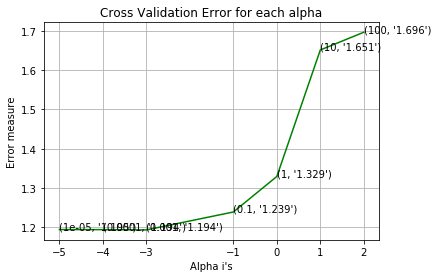

For values of best alpha =  0.001 The train log loss is: 0.5013207686151867
For values of best alpha =  0.001 The cross validation log loss is: 1.1935742154328284
For values of best alpha =  0.001 The test log loss is: 1.0914078025947689


In [97]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log Loss : 1.0914078025947689
Number of missclassified point : 0.3433734939759036
-------------------- Confusion matrix --------------------


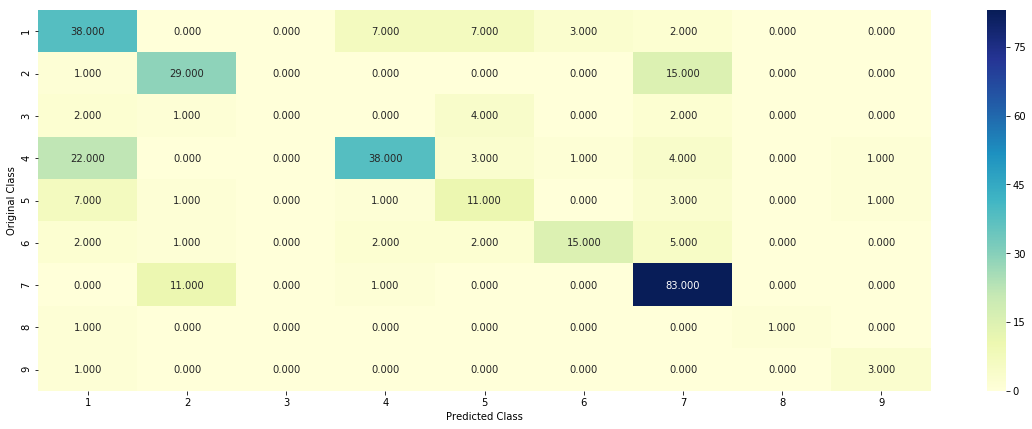

-------------------- Precision matrix (Columm Sum=1) --------------------


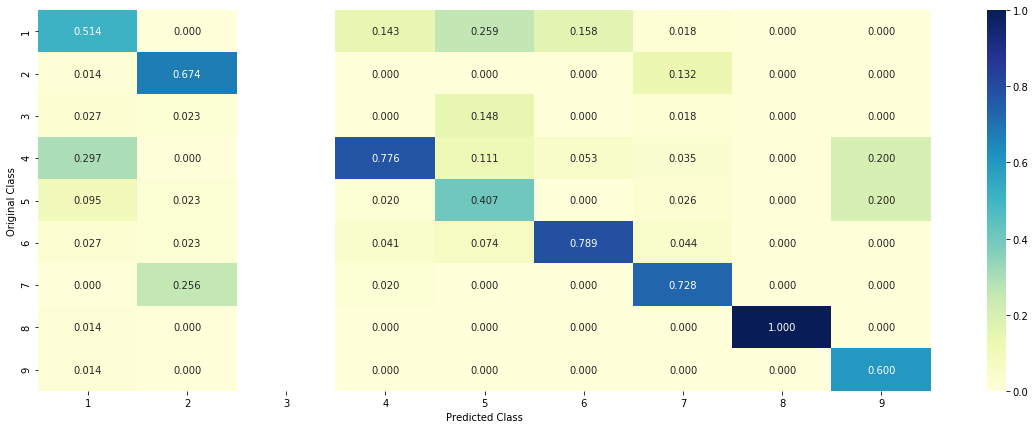

-------------------- Recall matrix (Row sum=1) --------------------


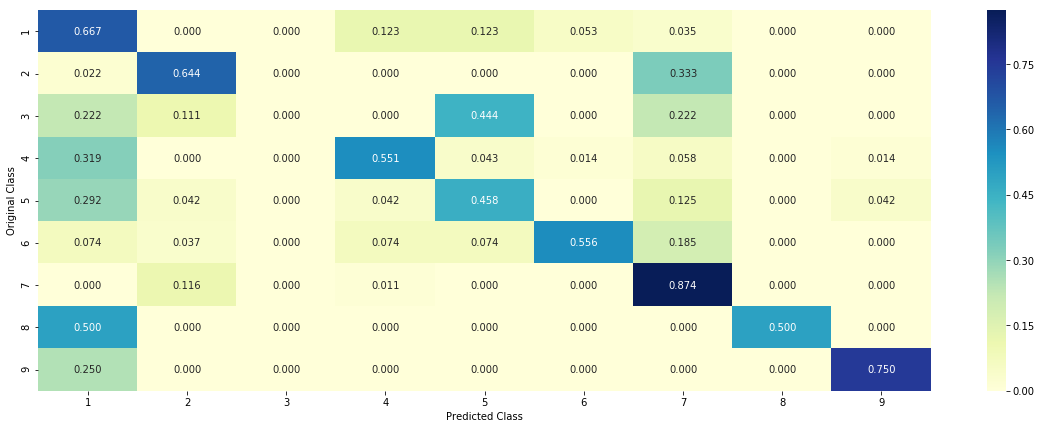

In [98]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(test_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y, sig_clf.predict(test_x_onehotCoding.toarray()))

# KNN

for alpha = 3
Log Loss : 1.067297954862549
for alpha = 5
Log Loss : 1.065315769216025
for alpha = 11
Log Loss : 1.067975067534859
for alpha = 15
Log Loss : 1.091609496381584
for alpha = 21
Log Loss : 1.116772655061037


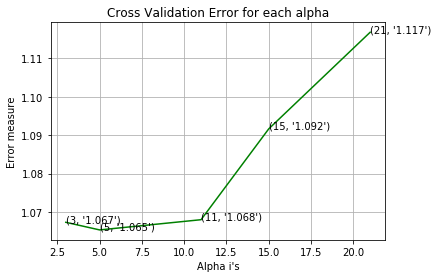

For values of best alpha =  5 The train log loss is: 0.8341908374306131
For values of best alpha =  5 The cross validation log loss is: 1.065315769216025
For values of best alpha =  5 The test log loss is: 1.0529188170498225


In [99]:
alpha = [3,5, 11, 15, 21]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log loss : 1.0529188170498225
Number of mis-classified points : 0.3463855421686747
-------------------- Confusion matrix --------------------


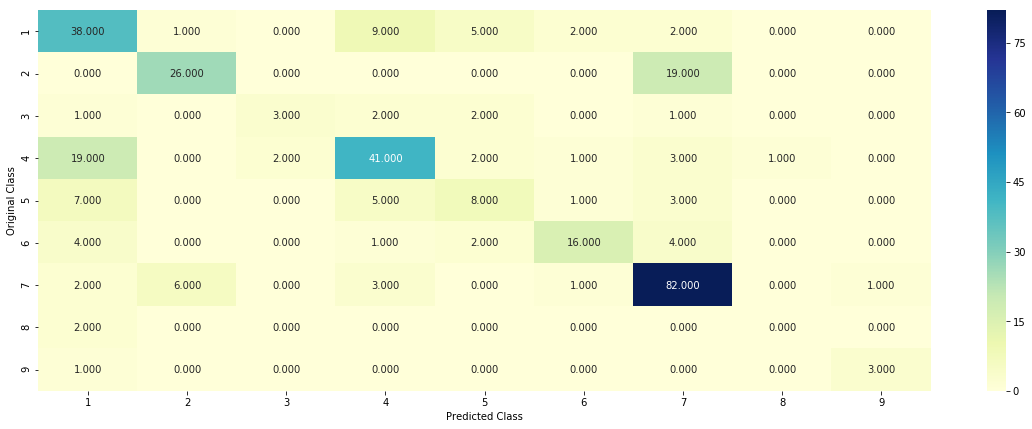

-------------------- Precision matrix (Columm Sum=1) --------------------


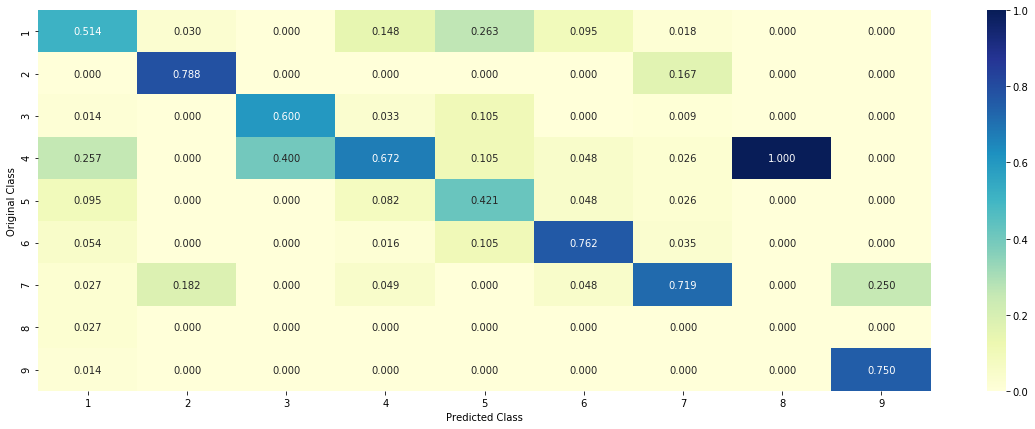

-------------------- Recall matrix (Row sum=1) --------------------


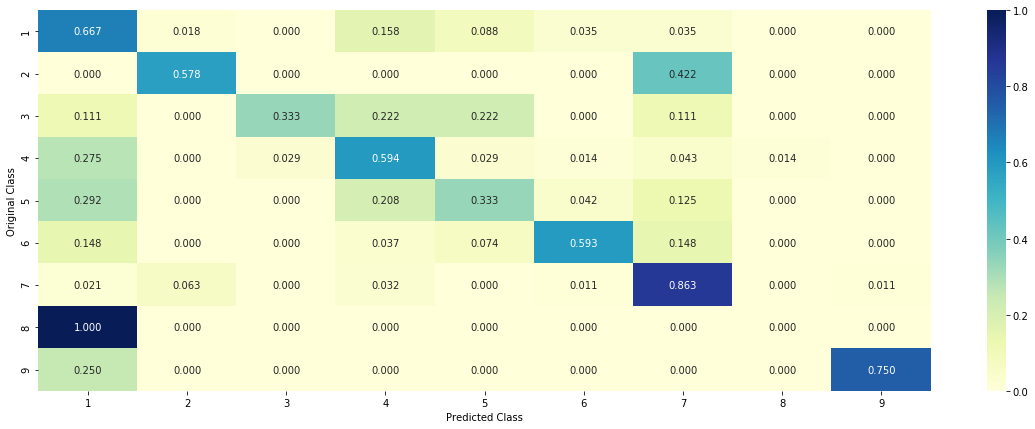

In [100]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

# Log-Reg with Class Balancing

for alpha = 1e-06
Log Loss : 1.2738423060413473
for alpha = 1e-05
Log Loss : 1.2995716720771664
for alpha = 0.0001
Log Loss : 1.1941030476331722
for alpha = 0.001
Log Loss : 1.0973963854326803
for alpha = 0.01
Log Loss : 1.260537539697297
for alpha = 0.1
Log Loss : 1.8983659735680998


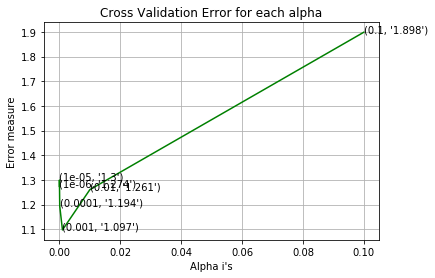

For values of best alpha =  0.001 The train log loss is: 0.7601381334077271
For values of best alpha =  0.001 The cross validation log loss is: 1.0973963854326803
For values of best alpha =  0.001 The test log loss is: 1.0255346258807896


In [101]:
alpha = [10 ** x for x in range(-6, 0)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0255346258807896
Number of mis-classified points : 0.3433734939759036
-------------------- Confusion matrix --------------------


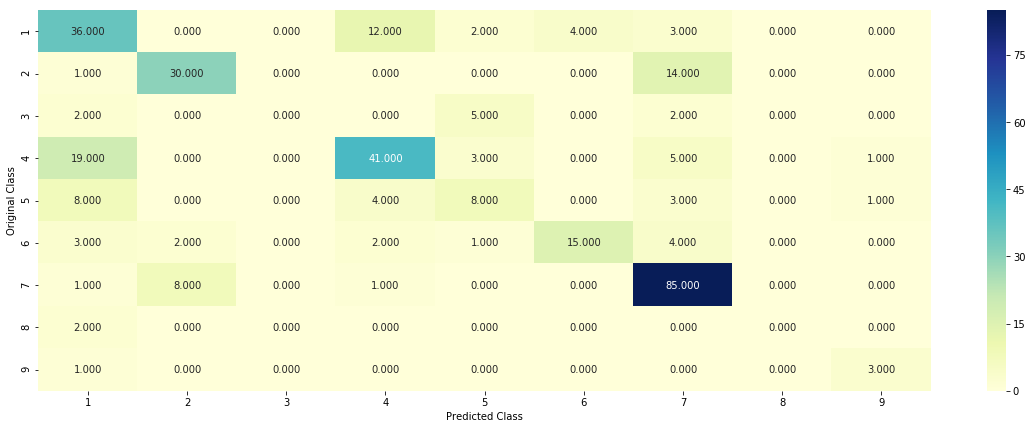

-------------------- Precision matrix (Columm Sum=1) --------------------


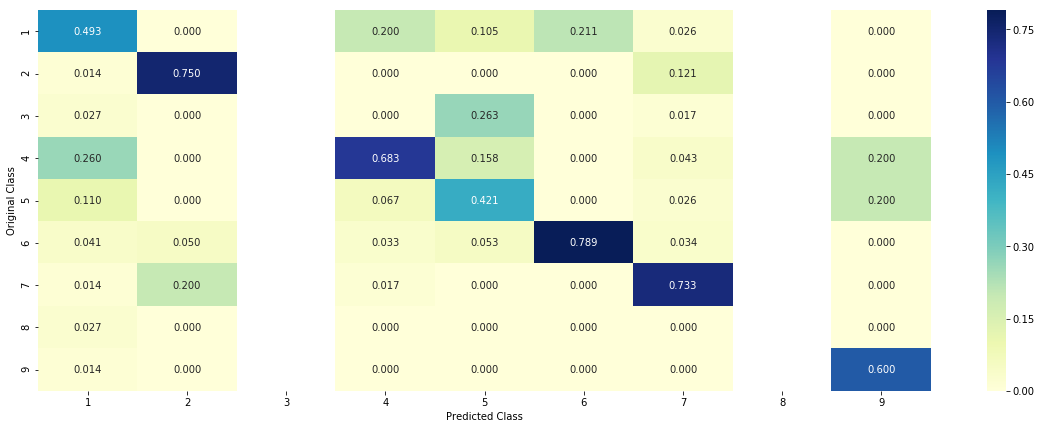

-------------------- Recall matrix (Row sum=1) --------------------


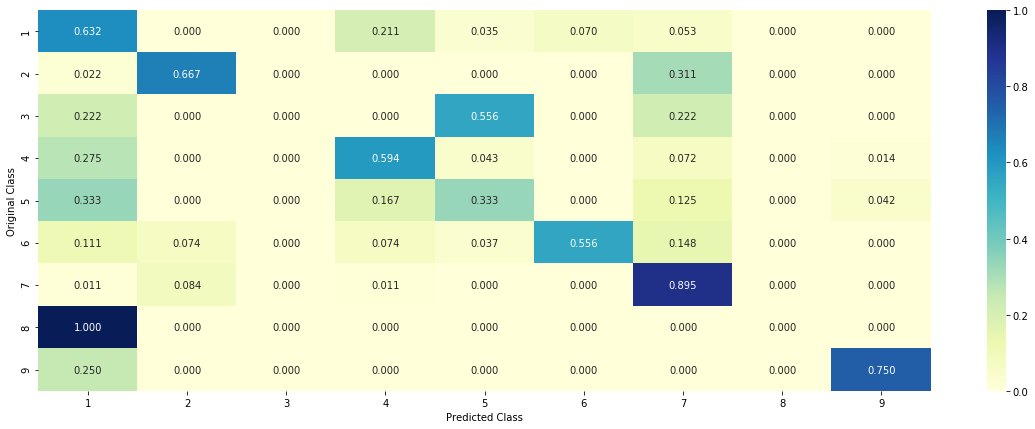

In [102]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

# Log-reg without Class Balancing

for alpha = 1e-06
Log Loss : 1.3127307490712579
for alpha = 1e-05
Log Loss : 1.3195294810891087
for alpha = 0.0001
Log Loss : 1.2803200821558967
for alpha = 0.001
Log Loss : 1.3837318024298377
for alpha = 0.01
Log Loss : 2.179214532618204
for alpha = 0.1
Log Loss : 2.864464420459042


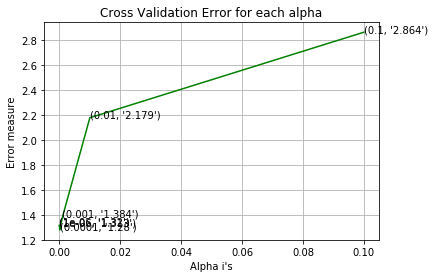

For values of best alpha =  0.0001 The train log loss is: 0.4369152833659351
For values of best alpha =  0.0001 The cross validation log loss is: 1.2803200821558967
For values of best alpha =  0.0001 The test log loss is: 1.1699488609329871


In [103]:
alpha = [10 ** x for x in range(-6, 0)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.1699488609329871
Number of mis-classified points : 0.3102409638554217
-------------------- Confusion matrix --------------------


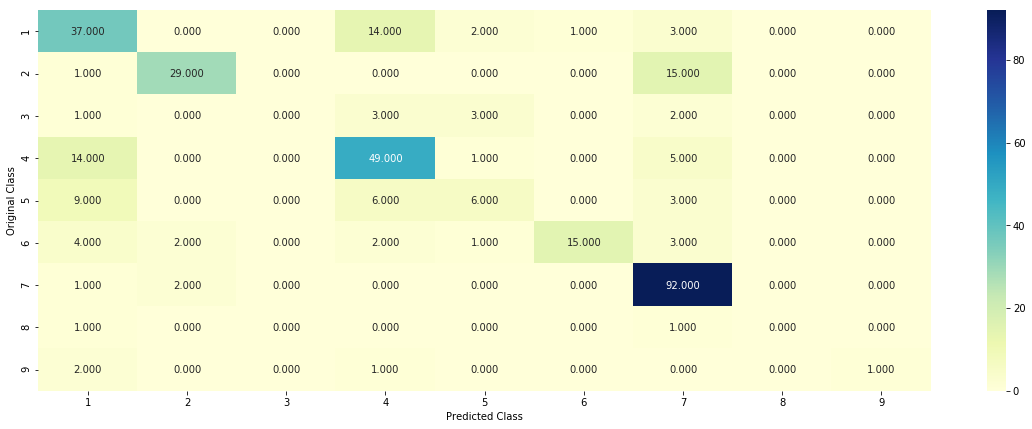

-------------------- Precision matrix (Columm Sum=1) --------------------


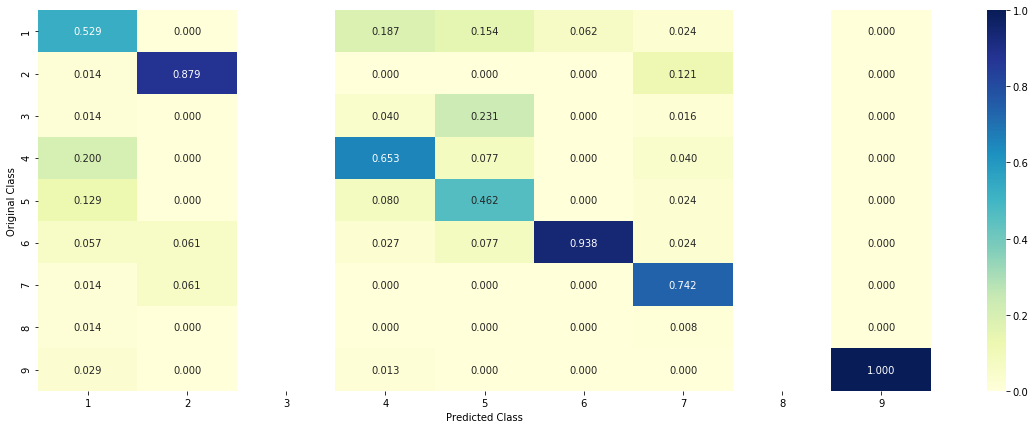

-------------------- Recall matrix (Row sum=1) --------------------


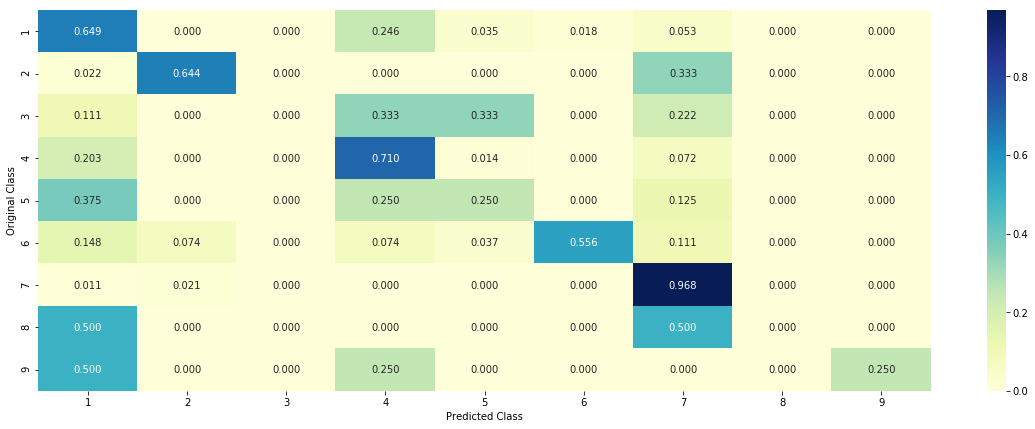

In [104]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

# Linear SVM

for C = 1e-05
Log Loss : 1.1811462360524059
for C = 0.0001
Log Loss : 1.1712703559106052
for C = 0.001
Log Loss : 1.0945052219827467
for C = 0.01
Log Loss : 2.003804284059065
for C = 0.1
Log Loss : 2.102007584879241


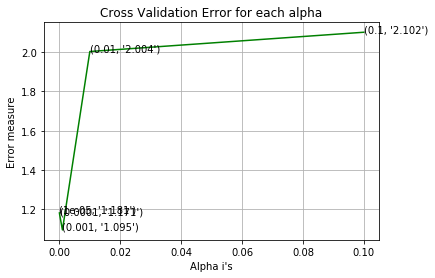

For values of best alpha =  0.001 The train log loss is: 0.6340661551201127
For values of best alpha =  0.001 The cross validation log loss is: 1.0945052219827467
For values of best alpha =  0.001 The test log loss is: 1.0613266795645497


In [105]:
alpha = [10 ** x for x in range(-5,0)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0613266795645497
Number of mis-classified points : 0.3313253012048193
-------------------- Confusion matrix --------------------


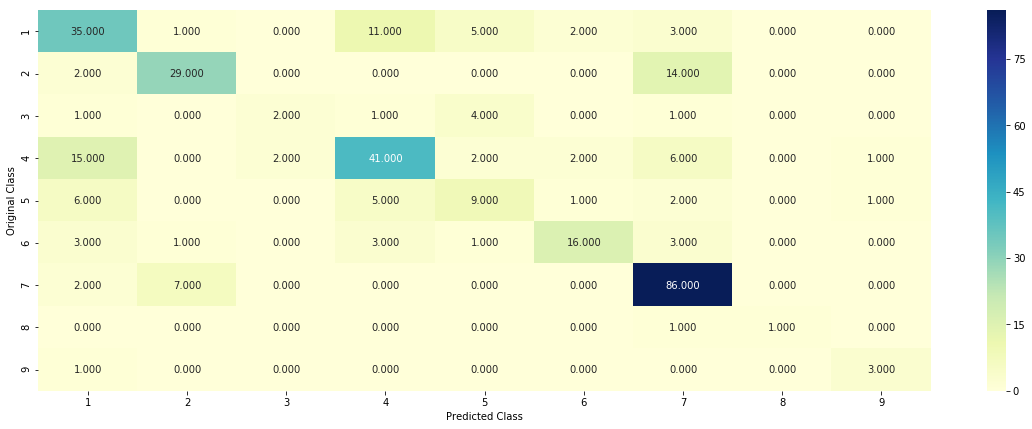

-------------------- Precision matrix (Columm Sum=1) --------------------


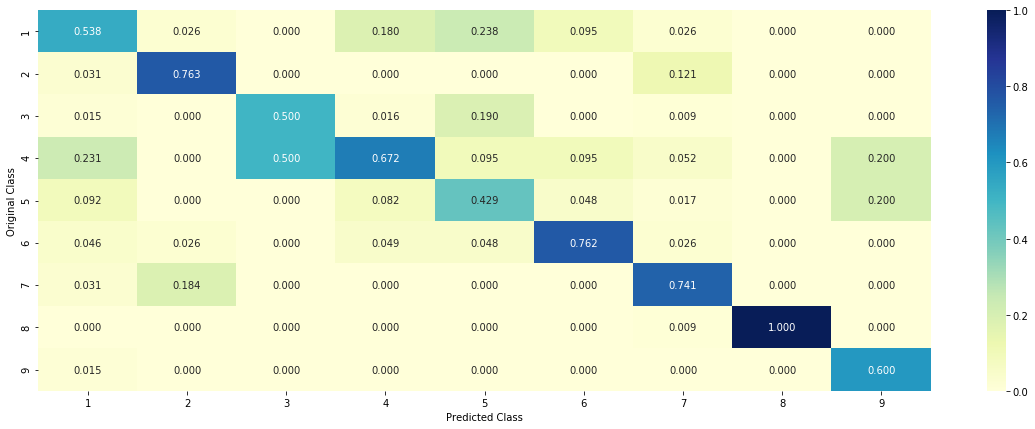

-------------------- Recall matrix (Row sum=1) --------------------


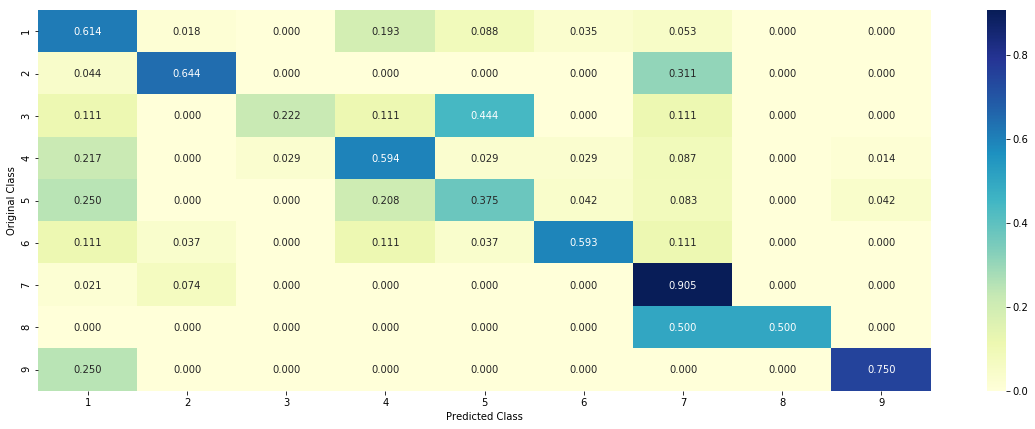

In [106]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,test_x_onehotCoding,test_y, clf)

# Random Forest

for n_estimators = 100 and max depth =  5
Log Loss : 1.294149589236556
for n_estimators = 100 and max depth =  10
Log Loss : 1.3620149459475046
for n_estimators = 200 and max depth =  5
Log Loss : 1.2890251163478108
for n_estimators = 200 and max depth =  10
Log Loss : 1.3423137485815662
for n_estimators = 500 and max depth =  5
Log Loss : 1.286728879288157
for n_estimators = 500 and max depth =  10
Log Loss : 1.3373403279146037
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2853863442812692
for n_estimators = 1000 and max depth =  10
Log Loss : 1.331711403743825
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2810458653334091
for n_estimators = 2000 and max depth =  10
Log Loss : 1.3285605462025278


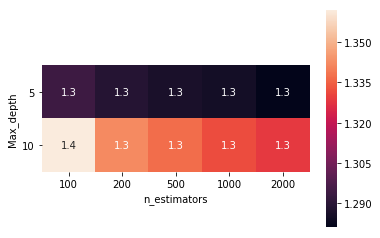

For values of best estimator =  2000 The train log loss is: 0.8708050170680193
For values of best estimator =  2000 The cross validation log loss is: 1.2810458653334091
For values of best estimator =  2000 The test log loss is: 1.2188774113049874


In [107]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
data = pd.DataFrame(np.array(cv_log_error_array).reshape(5,2), columns=max_depth, index = alpha)
# plot heatmap
ax = sns.heatmap(data.T,annot=True,square=True)
# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)
for item in ax.get_xticklabels():
    item.set_rotation(0)
# save figure
plt.ylabel('Max_depth')
plt.xlabel('n_estimators')
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.2188774113049872
Number of mis-classified points : 0.4246987951807229
-------------------- Confusion matrix --------------------


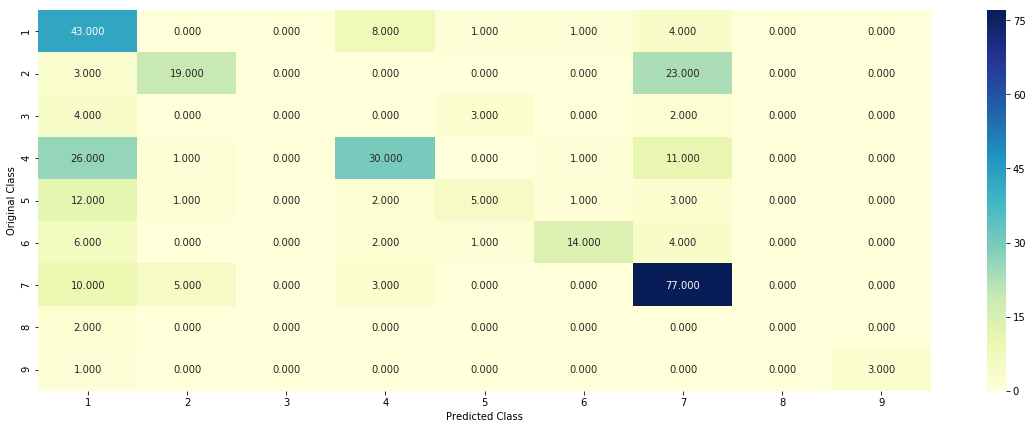

-------------------- Precision matrix (Columm Sum=1) --------------------


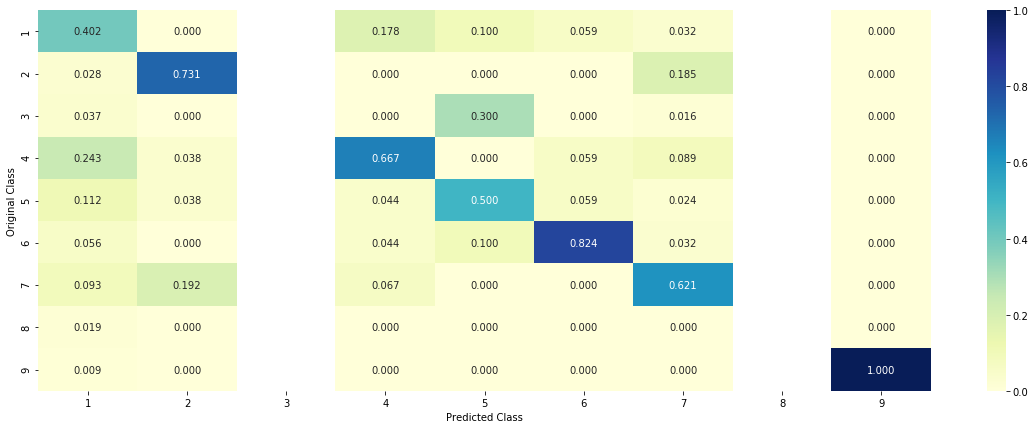

-------------------- Recall matrix (Row sum=1) --------------------


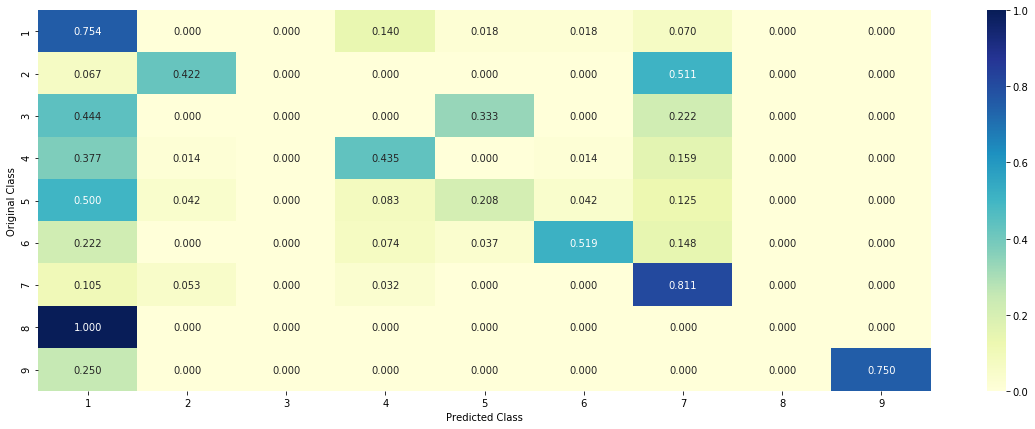

In [108]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=5, random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,test_x_onehotCoding,test_y, clf)

# Stack the models

In [109]:
clf1 = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.1)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,0.15,0.5] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.16
Support vector machines : Log Loss: 1.15
Naive Bayes : Log Loss: 1.24
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.162
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.912
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.302
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.195
Stacking Classifer : for the value of alpha: 0.150000 Log Loss: 1.233
Stacking Classifer : for the value of alpha: 0.500000 Log Loss: 1.410


Log loss (train) on the stacking classifier : 1.006878992037559
Log loss (CV) on the stacking classifier : 1.3016296634128437
Log loss (test) on the stacking classifier : 1.2692087349324617
Number of missclassified point : 0.3373493975903614
-------------------- Confusion matrix --------------------


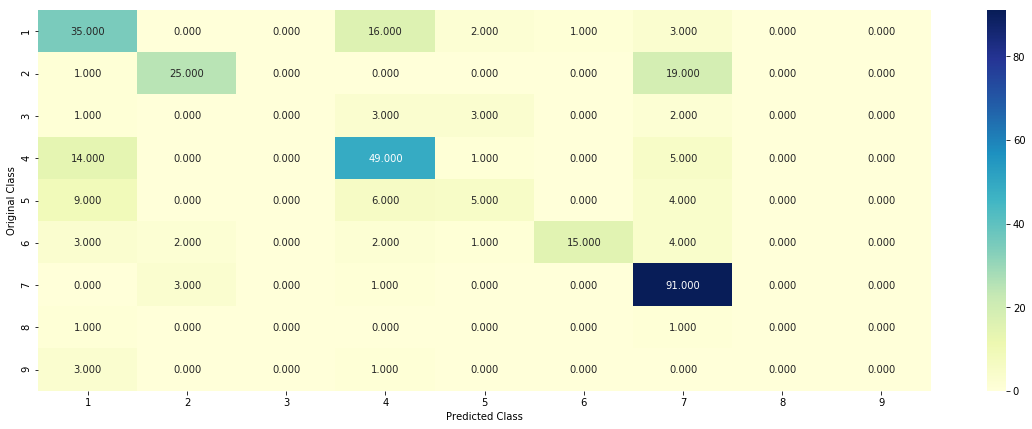

-------------------- Precision matrix (Columm Sum=1) --------------------


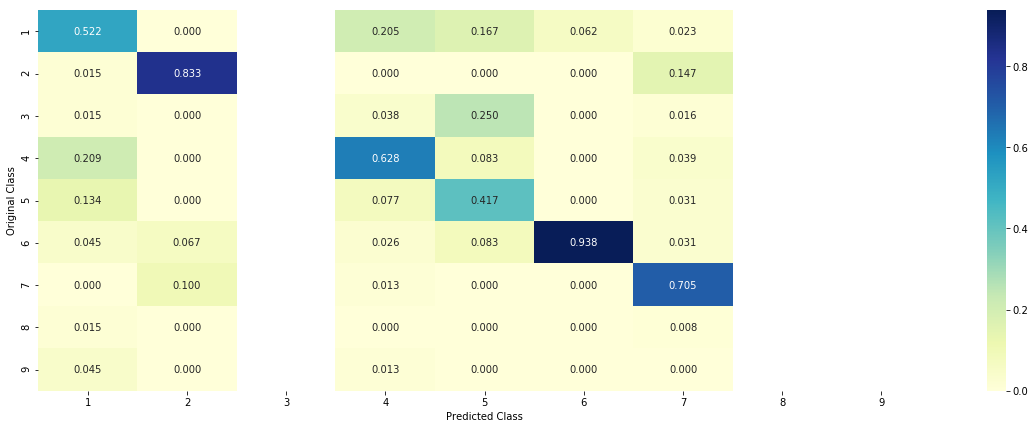

-------------------- Recall matrix (Row sum=1) --------------------


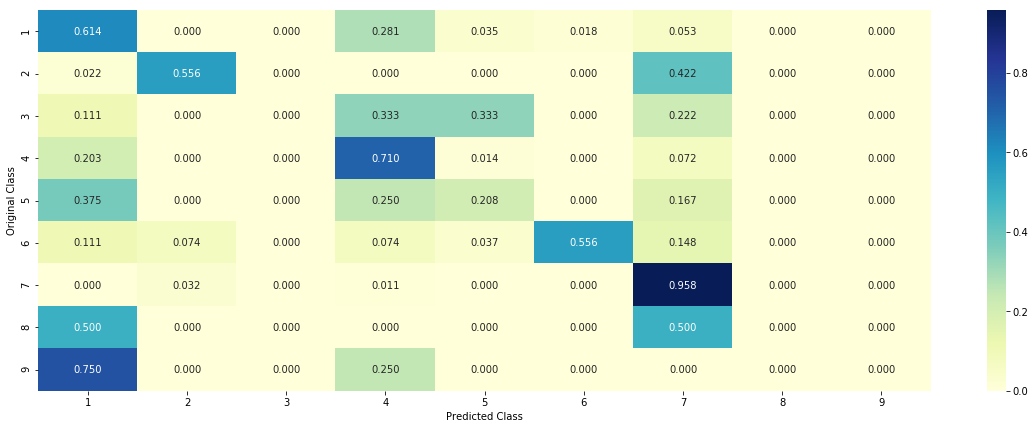

In [110]:
lr = LogisticRegression(C=0.01)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

# Max-Voting-Classifier

Log loss (train) on the VotingClassifier : 0.4722422860770622
Log loss (CV) on the VotingClassifier : 1.0529555328828357
Log loss (test) on the VotingClassifier : 0.9843867167832028
Number of missclassified point : 0.3253012048192771
-------------------- Confusion matrix --------------------


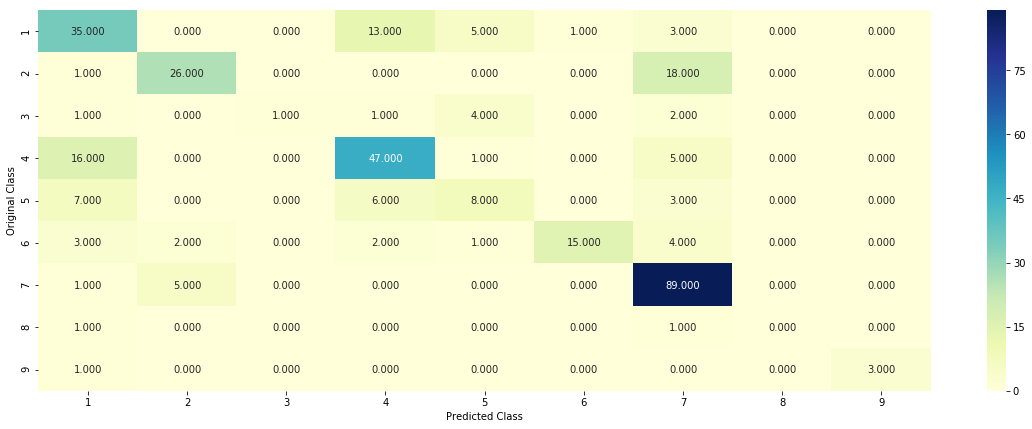

-------------------- Precision matrix (Columm Sum=1) --------------------


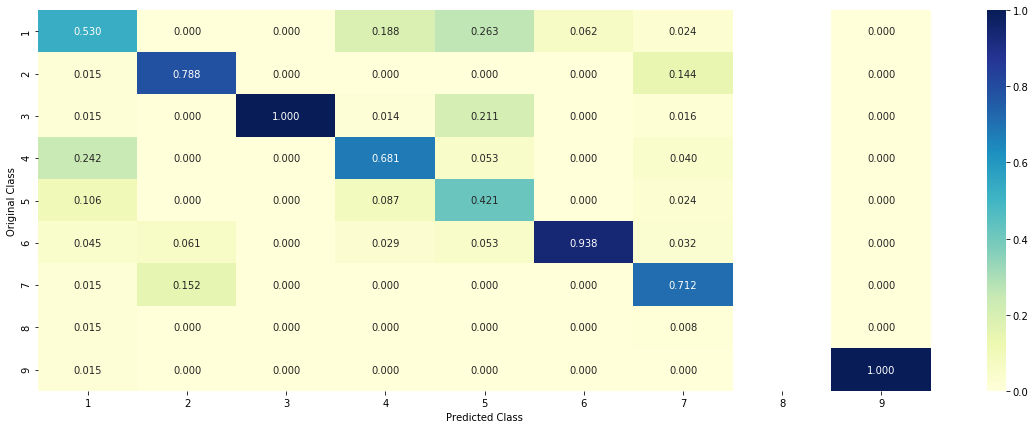

-------------------- Recall matrix (Row sum=1) --------------------


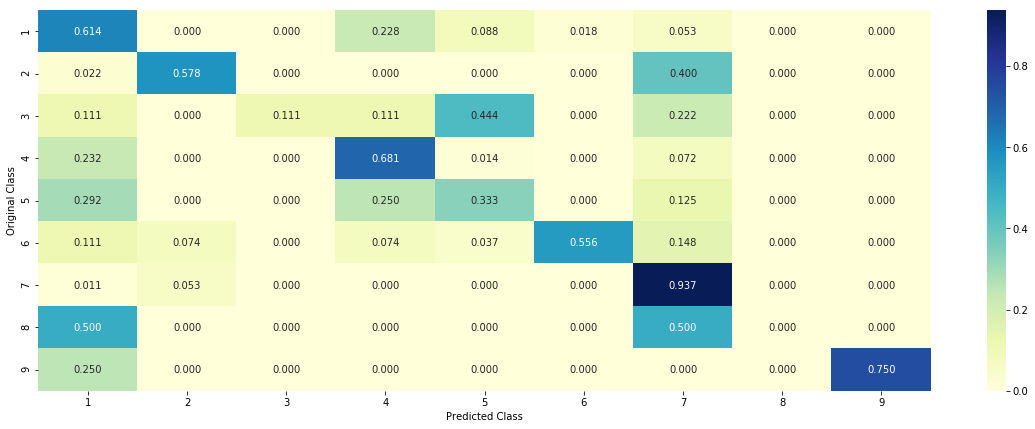

In [111]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

In [112]:
from prettytable import PrettyTable
y = PrettyTable(['Tfidf with 1000 max features'])
print(y)
x  =PrettyTable(["Model", "Train Loss",'CV loss','Test Loss','% misclassified points'])
x.add_row(['Naive Bayes',0.74,1.19,1.14,37.74])
x.add_row(['KNN',0.93,1.21,1.14,38.79])
x.add_row(['Logistic Reg',0.79,1.11 , 0.98,33.38])
x.add_row(['Random Forest',0.84,1.19,1.191,42.11])
x.add_row(['Stacking Classifer',0.62,1.03,1.08,35.78])
x.add_row(['Max-Voting Classifier',0.66,0.99,1.04,35.48])
x.add_row(['Linear-SVM',0.80,1.15,1.06,33.68])
print(x)

+------------------------------+
| Tfidf with 5000 max features |
+------------------------------+
+------------------------------+
+-----------------------+------------+---------+-----------+------------------------+
|         Model         | Train Loss | CV loss | Test Loss | % misclassified points |
+-----------------------+------------+---------+-----------+------------------------+
|      Naive Bayes      |    0.74    |   1.19  |    1.14   |         37.74          |
|          KNN          |    0.93    |   1.21  |    1.14   |         38.79          |
|      Logistic Reg     |    0.79    |   1.11  |    0.98   |         33.38          |
|     Random Forest     |    0.84    |   1.19  |   1.191   |         42.11          |
|   Stacking Classifer  |    0.62    |   1.03  |    1.08   |         35.78          |
| Max-Voting Classifier |    0.66    |   0.99  |    1.04   |         35.48          |
|       Linear-SVM      |    0.8     |   1.15  |    1.06   |         33.68          |
+-------

In [113]:
del test_x_onehotCoding,cv_x_onehotCoding,train_x_onehotCoding


# Log-reg with CountVectorizer Features, with unigrams and bigrams

In [44]:
# one-hot encoding of Gene feature.
gene_bow_vectorizer = CountVectorizer()
train_gene_feature_bow_onehotCoding = gene_bow_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_bow_onehotCoding = gene_bow_vectorizer.transform(test_df['Gene'])
cv_gene_feature_bow_onehotCoding = gene_bow_vectorizer.transform(cv_df['Gene'])


print("converted feature using one-hot encoding method. The final shape is:", train_gene_feature_bow_onehotCoding.shape)
# one-hot encoding of variation feature.
variation_bow_vectorizer = CountVectorizer()
train_variation_feature_bow_onehotCoding = variation_bow_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_bow_onehotCoding = variation_bow_vectorizer.transform(test_df['Variation'])
cv_variation_feature_bow_onehotCoding = variation_bow_vectorizer.transform(cv_df['Variation'])

print("train_variation_feature_bow_onehotEncoded is converted . The shape of Variation feature:", train_variation_feature_bow_onehotCoding.shape)

converted feature using one-hot encoding method. The final shape is: (2689, 246)
train_variation_feature_bow_onehotEncoded is converted . The shape of Variation feature: (2689, 2461)


In [45]:
# building a CountVectorizer with all the words that occured minimum 10 times in train data
text_bow_vectorizer = CountVectorizer(ngram_range = (1, 2),min_df=50)
train_text_feature_bow_onehotCoding = text_bow_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_bow_features= text_bow_vectorizer.get_feature_names()
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_bow_fea_counts = train_text_feature_bow_onehotCoding.sum(axis=0).A1
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_bow_fea_dict = dict(zip(list(train_text_bow_features),train_text_bow_fea_counts))
print("Total number of unique words in train data :", len(train_text_bow_features))

Total number of unique words in train data : 41980


In [46]:
# normalize every feature
train_text_feature_bow_onehotCoding = normalize(train_text_feature_bow_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_bow_onehotCoding = text_bow_vectorizer.transform(test_df['TEXT'])
# normalize every feature
test_text_feature_bow_onehotCoding = normalize(test_text_feature_bow_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_bow_onehotCoding = text_bow_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_bow_onehotCoding = normalize(cv_text_feature_bow_onehotCoding, axis=0)

train_variation_feature_bow_onehotCoding = normalize(train_variation_feature_bow_onehotCoding, axis=0)
test_variation_feature_bow_onehotCoding = normalize(test_variation_feature_bow_onehotCoding, axis=0)

train_gene_feature_bow_onehotCoding = normalize(train_gene_feature_bow_onehotCoding, axis=0)
test_gene_feature_bow_onehotCoding = normalize(test_gene_feature_bow_onehotCoding, axis=0)

In [47]:
train_gene_var_onehotCoding = hstack((train_gene_feature_bow_onehotCoding,train_variation_feature_bow_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_bow_onehotCoding,test_variation_feature_bow_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_bow_onehotCoding,cv_variation_feature_bow_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_bow_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_bow_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_bow_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [48]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2689, 44687)
(number of data points * number of features) in test data =  (333, 44687)
(number of data points * number of features) in cross validation data = (299, 44687)


for alpha = 1e-06
Log Loss : 1.4198780224372165
for alpha = 1e-05
Log Loss : 1.4951718621029748
for alpha = 0.0001
Log Loss : 1.471436959887359
for alpha = 0.001
Log Loss : 1.425516242640449
for alpha = 0.01
Log Loss : 1.5024810853559603


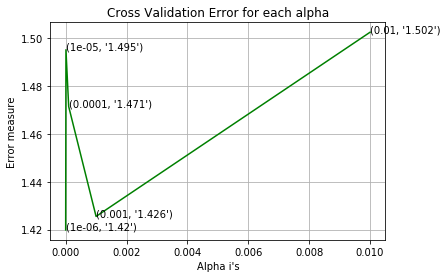

For values of best alpha =  1e-06 The train log loss is: 1.1508410353130392
For values of best alpha =  1e-06 The cross validation log loss is: 1.4198780224372165
For values of best alpha =  1e-06 The test log loss is: 1.3209905478102633


In [49]:
alpha = [0.000001,0.00001,0.0001,0.001,0.01]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.3209905478102633
Number of mis-classified points : 0.3963963963963964
-------------------- Confusion matrix --------------------


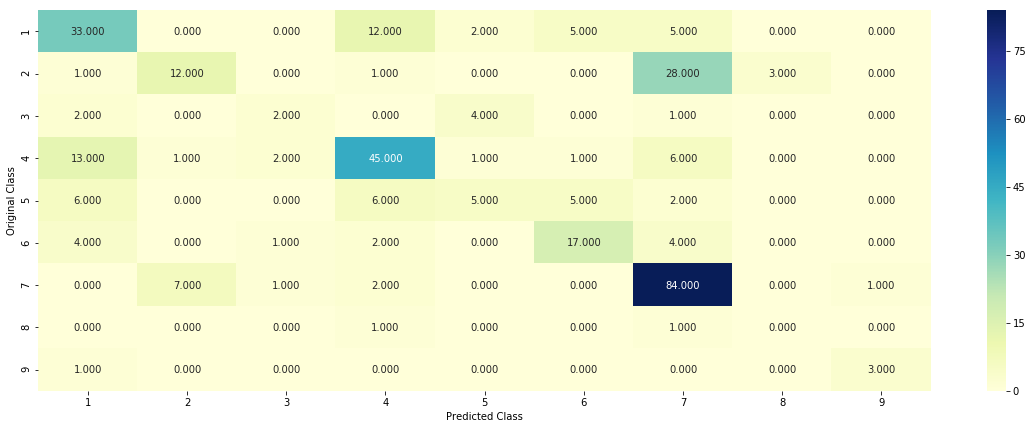

-------------------- Precision matrix (Columm Sum=1) --------------------


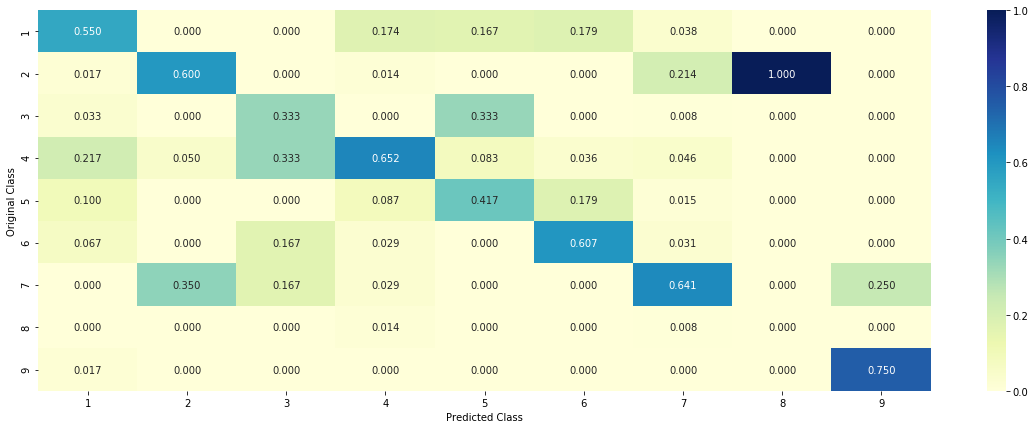

-------------------- Recall matrix (Row sum=1) --------------------


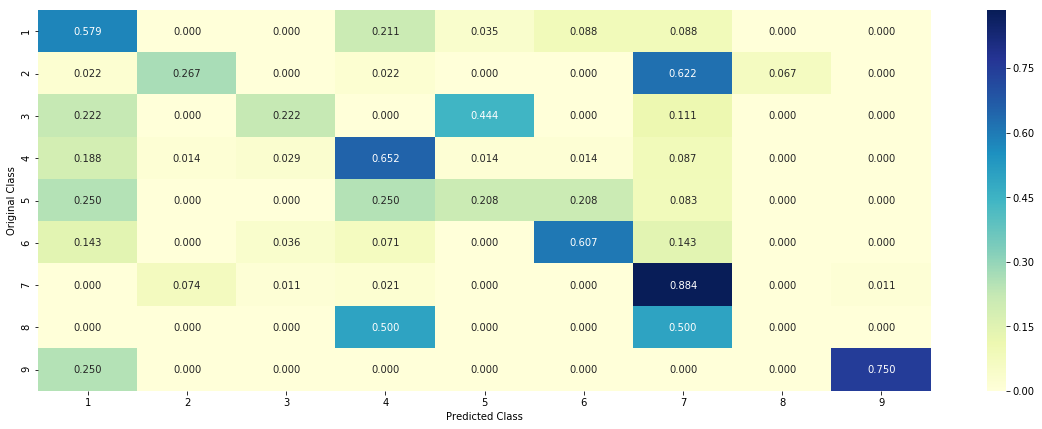

In [56]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

In [9]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train,X_test, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.1,random_state=42)

In [141]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(X_train['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(X_test['Gene'])
print( train_gene_feature_onehotCoding.shape)

(2984, 248)


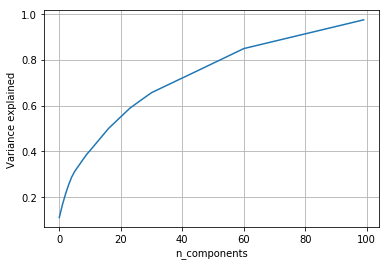

converted feature using one-hot encoding method. The before trunc shape is: (2984, 248)
converted feature using one-hot encoding method. The before trunc shape is: (2984, 100)


In [98]:
from sklearn.decomposition import TruncatedSVD
from scipy import sparse
svd = TruncatedSVD(n_components=100, n_iter=100, random_state=12)
truncated_gene_train = sparse.csr_matrix(svd.fit_transform(train_gene_feature_onehotCoding))
truncated_gene_test = sparse.csr_matrix(svd.fit_transform(test_gene_feature_onehotCoding))


explained_var = svd.explained_variance_ratio_
e = np.cumsum(explained_var)

plt.plot(e)
plt.xlabel('n_components')
plt.grid()
plt.ylabel('Variance explained')
plt.show()

print("converted feature using one-hot encoding method. The before trunc shape is:", train_gene_feature_onehotCoding.shape)
print("converted feature using one-hot encoding method. The before trunc shape is:", truncated_gene_train.shape)



In [142]:
# one-hot encoding of Gene feature.
var_vectorizer = TfidfVectorizer()
train_var_feature_onehotCoding = var_vectorizer.fit_transform(X_train['Variation'])
test_var_feature_onehotCoding = var_vectorizer.transform(X_test['Variation'])
print(train_var_feature_onehotCoding.shape)


(2984, 2728)


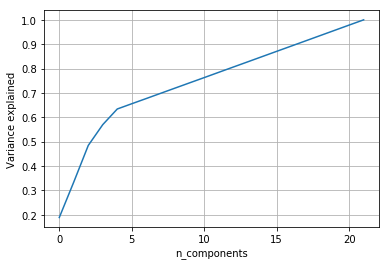

converted feature using one-hot encoding method. The before trunc shape is: (2984, 2728)
converted feature using one-hot encoding method. The before trunc shape is: (2984, 22)


In [104]:
svd = TruncatedSVD(n_components=22, n_iter=100, random_state=12)
truncated_var_train = sparse.csr_matrix(svd.fit_transform(train_var_feature_onehotCoding))
truncated_var_test = sparse.csr_matrix(svd.fit_transform(test_var_feature_onehotCoding))

explained_var = svd.explained_variance_ratio_
e = np.cumsum(explained_var)

plt.plot(e)
plt.xlabel('n_components')
plt.grid()
plt.ylabel('Variance explained')
plt.show()

print("converted feature using one-hot encoding method. The before trunc shape is:", train_var_feature_onehotCoding.shape)
print("converted feature using one-hot encoding method. The before trunc shape is:", truncated_var_train.shape)

In [177]:
# building a CountVectorizer with all the words that occured minimum 10 times in train data
text_vectorizer = TfidfVectorizer(ngram_range = (1,3),max_features=2000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(X_train['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(X_test['TEXT'])
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 2000


In [178]:
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)


In [143]:
train_var_feature_onehotCoding = normalize(train_var_feature_onehotCoding, axis=0)
test_var_feature_onehotCoding = normalize(test_var_feature_onehotCoding, axis=0)

train_gene_feature_onehotCoding = normalize(train_gene_feature_onehotCoding, axis=0)
test_gene_feature_onehotCoding = normalize(test_gene_feature_onehotCoding, axis=0)

In [172]:
# for adding new features TextLen and GeneOccure

tr_new = hstack((train_text_feature_bow_onehotCoding,np.array(train_df['TextLen'])[:,None])).tocsr()
te_new = hstack((test_text_feature_bow_onehotCoding,np.array(test_df['TextLen'])[:,None])).tocsr()
cv_new = hstack((cv_text_feature_bow_onehotCoding,np.array(cv_df['TextLen'])[:,None])).tocsr()

train_text_feature_bow_onehotCoding = hstack((tr_new,np.array(train_df['GeneOccure'])[:,None])).tocsr()
test_text_feature_bow_onehotCoding = hstack((te_new,np.array(test_df['GeneOccure'])[:,None])).tocsr()
cv_text_feature_bow_onehotCoding= hstack((cv_new,np.array(cv_df['GeneOccure'])[:,None])).tocsr()


In [179]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_var_feature_onehotCoding)).tocsr()
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_var_feature_onehotCoding)).tocsr()


train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(X_train['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(X_test['Class']))


In [180]:
test_x_onehotCoding.shape

(332, 4976)

In [181]:
start = time.time()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
random_parameters = {'C':uniform(),'penalty':['l1','l2']}
randomSearchModel = RandomizedSearchCV(log_rg, random_parameters, cv=10,n_jobs=-1)
randomSearchModel.fit(train_x_onehotCoding,train_y)
print("randomSearch: ",randomSearchModel.best_params_)
print('Parameters search time: ',(time.time() - start))

randomSearch:  {'C': 0.9077970472521314, 'penalty': 'l2'}
Parameters search time:  75.78392934799194


In [182]:

clf_log_rg_rs = LogisticRegression(class_weight='balanced',penalty=randomSearchModel.best_params_['penalty'], C=randomSearchModel.best_params_['C'],solver = 'liblinear',)
clf_log_rg_rs.fit(train_x_onehotCoding, train_y)
tr_score = clf_log_rg_rs.score(train_x_onehotCoding, train_y)
print("RandomSearch")
print("Training Accuracy :",tr_score)
tr_score = clf_log_rg_rs.score(test_x_onehotCoding, test_y)
print("Test Accuracy :",tr_score)
print("**************************************************************************")
print("Log Loss")
print("**************************************************************************")
print('RandomSearch')
predict_y = clf_log_rg_rs.predict_proba(train_x_onehotCoding)
print("The train log loss is:",log_loss(train_y, predict_y, labels=clf_log_rg_rs.classes_, eps=1e-5))
predict_y = clf_log_rg_rs.predict_proba(test_x_onehotCoding)
print("The test log loss is:",log_loss(test_y, predict_y, labels=clf_log_rg_rs.classes_, eps=1e-5))

RandomSearch
Training Accuracy : 0.8847184986595175
Test Accuracy : 0.6204819277108434
**************************************************************************
Log Loss
**************************************************************************
RandomSearch
The train log loss is: 0.8942830871193788
The test log loss is: 1.1588166718502875


In [153]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(loss = 'hinge',class_weight ='balanced')
start= time.time()
grid_parameters = {'C':[10**-3,10**-2,10**0,10**2,10**3]}
gridSearchModel = GridSearchCV(svm_clf, grid_parameters, cv=10,n_jobs=-1)
gridSearchModel.fit(train_x_onehotCoding, train_y)
print(gridSearchModel.best_params_)
print('GridSearch Time: ',(time.time() - start))

{'C': 100}
GridSearch Time:  122.64737153053284


Best: -0.647118 using {'C': 100}
-0.514410 (0.027006) with: {'C': 0.001}
-0.554625 (0.019403) with: {'C': 0.01}
-0.644437 (0.035226) with: {'C': 1}
-0.647118 (0.034090) with: {'C': 100}
-0.647118 (0.034090) with: {'C': 1000}


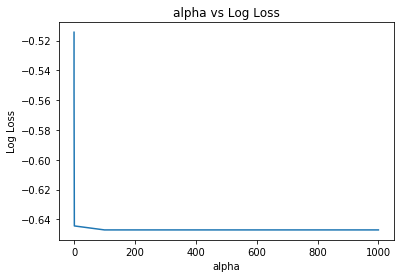

In [154]:
print("Best: %f using %s" % (-gridSearchModel.best_score_, gridSearchModel.best_params_))
means = gridSearchModel.cv_results_['mean_test_score']
stds = gridSearchModel.cv_results_['std_test_score']
params = gridSearchModel.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))
# plot
plt.errorbar([10**-3,10**-2,10**0,10**2,10**3], -means)
plt.title("alpha vs Log Loss")
plt.xlabel('alpha')
plt.ylabel('Log Loss')
plt.show()

In [155]:
lr_svm = LinearSVC(C=gridSearchModel.best_params_['C'],class_weight='balanced')
lr_svm.fit(train_x_onehotCoding, train_y)
tr_score = lr_svm.score(train_x_onehotCoding, train_y)
print("GridSearch")
print('*******************Accuracy****************')
print("Training Accuracy :",tr_score)
tr_score = lr_svm.score(test_x_onehotCoding, test_y)
print("Test Accuracy :",tr_score)
print('******************Hinge Loss***************')
from sklearn.metrics import hinge_loss
print("Train loss :",hinge_loss(train_y,lr_svm.predict(train_x_onehotCoding)))
print("Test loss :",hinge_loss(test_y,lr_svm.predict(test_x_onehotCoding)))

GridSearch
*******************Accuracy****************
Training Accuracy : 1.0
Test Accuracy : 0.6566265060240963
******************Hinge Loss***************


IndexError: too many indices for array

In [148]:
train_x_onehotCoding=normalize(train_x_onehotCoding, axis=0)
test_x_onehotCoding=normalize(test_x_onehotCoding, axis=0)
cv_x_onehotCoding=normalize(cv_x_onehotCoding, axis=0)

In [156]:
import xgboost as xgb
xgb_bow = xgb.XGBClassifier(n_estimators=100).fit(train_x_onehotCoding,train_y)
pred = xgb_bow.predict(train_x_onehotCoding)
# evaluate accuracy
acc = accuracy_score(train_y, pred) * 100
print('\nThe Train accuracy of the xgbdt classifier is %f%%' % (acc))
# predict the response
pred = xgb_bow.predict(test_x_onehotCoding)
# evaluate accuracy
acc = accuracy_score(test_y, pred) * 100
print('\nThe cv accuracy of the xgbdt classifier is %f%%' % (acc))

predict_y = xgb_bow.predict_proba(train_x_onehotCoding)
print("The train log loss is:",log_loss(train_y, predict_y, labels=xgb_bow.classes_, eps=1e-15))
predict_y = xgb_bow.predict_proba(test_x_onehotCoding)
print("The cv log loss is:",log_loss(test_y, predict_y, labels=xgb_bow.classes_, eps=1e-15))


The Train accuracy of the xgbdt classifier is 86.427614%

The cv accuracy of the xgbdt classifier is 59.939759%
The train log loss is: 0.4889176467111479
The cv log loss is: 1.165140187681978


for alpha = 9e-05
Log Loss : 1.2654938963101994
for alpha = 5e-05
Log Loss : 1.2320636538788663
for alpha = 0.0001
Log Loss : 1.2722872574198467
for alpha = 0.00011
Log Loss : 1.280630173829438
for alpha = 0.00012
Log Loss : 1.2889559850291963
for alpha = 0.00013
Log Loss : 1.2961595482686528
for alpha = 0.00014
Log Loss : 1.3069353040431124
for alpha = 0.00015
Log Loss : 1.3157596163058176
for alpha = 0.00016
Log Loss : 1.3238947436245065
for alpha = 0.00017
Log Loss : 1.3320216285555901
for alpha = 0.00018
Log Loss : 1.3391661613304844


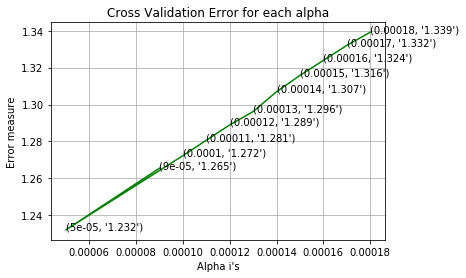

For values of best alpha =  5e-05 The train log loss is: 0.7047122297951431
For values of best alpha =  5e-05 The cross validation log loss is: 1.2320636538788663
For values of best alpha =  5e-05 The test log loss is: 1.1058589738588338


In [149]:
alpha = [0.00009,0.00005,0.0001,0.00011,0.00012,0.00013,0.00014,0.00015,0.00016,0.00017,0.00018]
l1_r=[0.05,0.1,0.15,0.25,0.35,0.5,0.75,1]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='log', random_state=42,n_jobs=-1,tol=0.00001,n_iter=2000)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,tol=0.00001,n_iter=2000)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.1888906435981326
Number of mis-classified points : 0.31626506024096385
-------------------- Confusion matrix --------------------


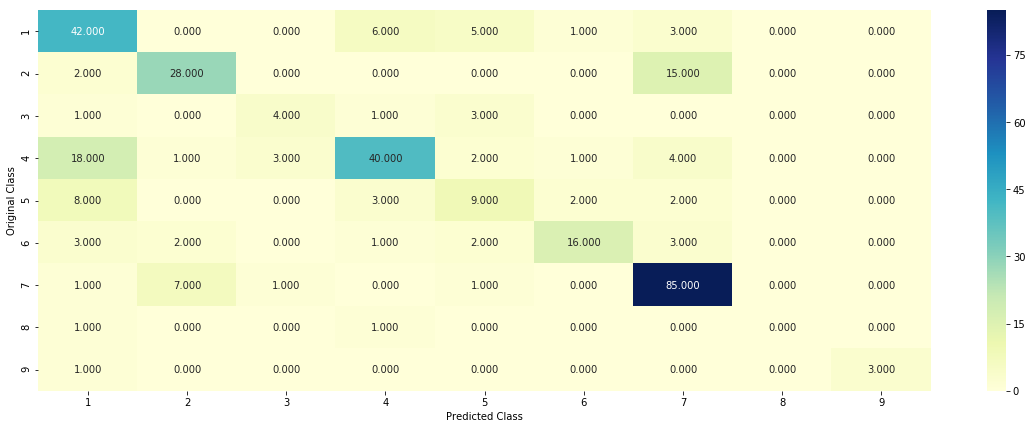

-------------------- Precision matrix (Columm Sum=1) --------------------


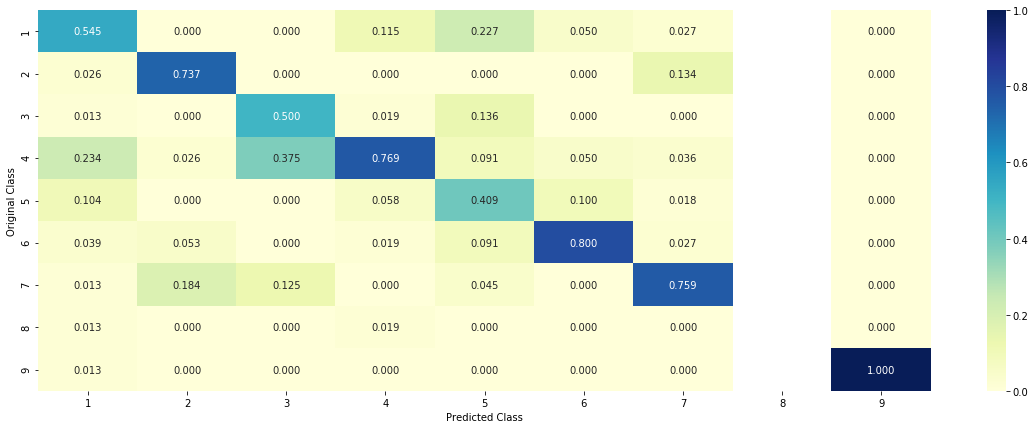

-------------------- Recall matrix (Row sum=1) --------------------


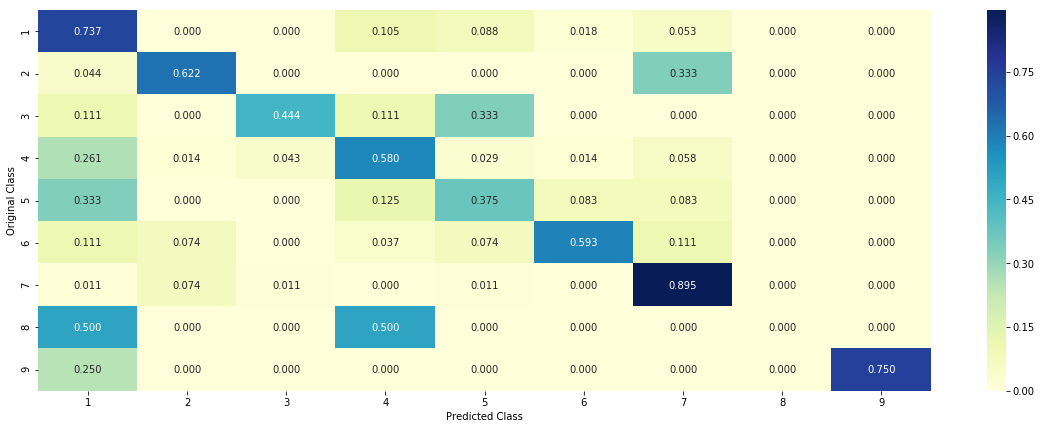

In [205]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,tol=0.00001,n_iter=2000)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

for C = 0.0001
Log Loss : 1.14992779159974
for C = 0.0009
Log Loss : 1.1338336979307222
for C = 0.0008
Log Loss : 1.1478019799120853
for C = 0.0007
Log Loss : 1.1755703501097972
for C = 0.0006
Log Loss : 1.1132667002840504
for C = 0.0004
Log Loss : 1.1350665967301763
for C = 0.0003
Log Loss : 1.1921669394259768
for C = 0.001
Log Loss : 1.1726348614079032
for C = 0.0012
Log Loss : 1.1839743495531978
for C = 0.0015
Log Loss : 1.1752670744537352


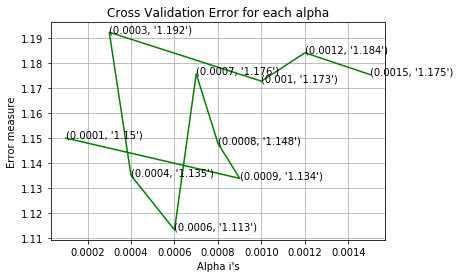

For values of best alpha =  0.0006 The train log loss is: 0.7653941039546094
For values of best alpha =  0.0006 The cross validation log loss is: 1.1132667002840504
For values of best alpha =  0.0006 The test log loss is: 1.2632468710365168


In [229]:
alpha = [0.0001,0.0009,0.0008,0.0007,0.0006,0.0004,0.0003,0.001,0.0012,0.0015]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42,tol=0.00001,n_iter=2000)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,tol=0.00001,n_iter=2000)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.188714072417902
Number of mis-classified points : 0.35542168674698793
-------------------- Confusion matrix --------------------


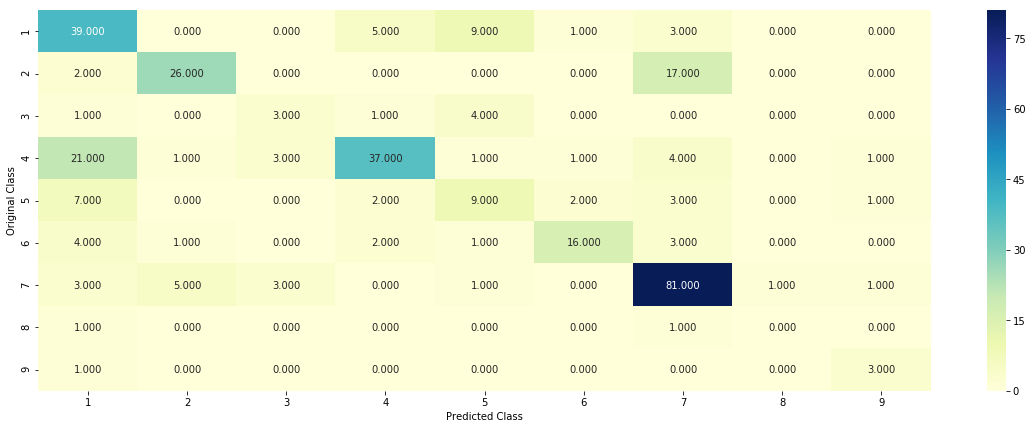

-------------------- Precision matrix (Columm Sum=1) --------------------


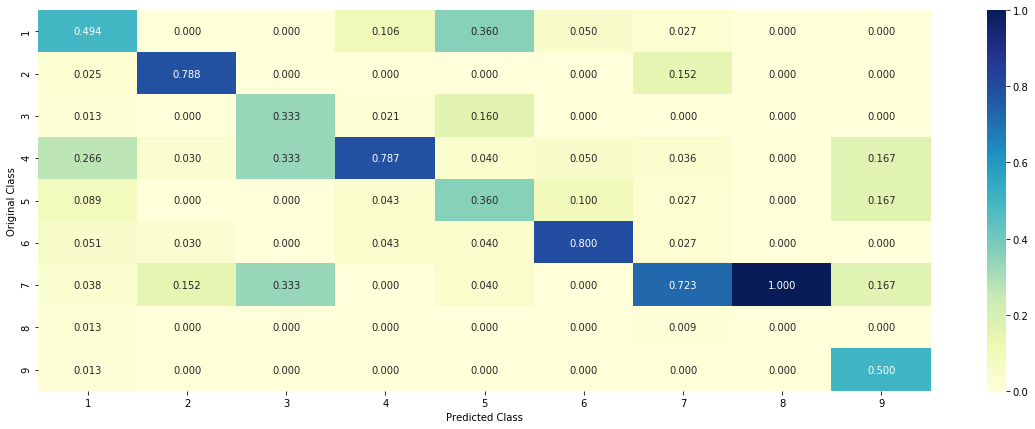

-------------------- Recall matrix (Row sum=1) --------------------


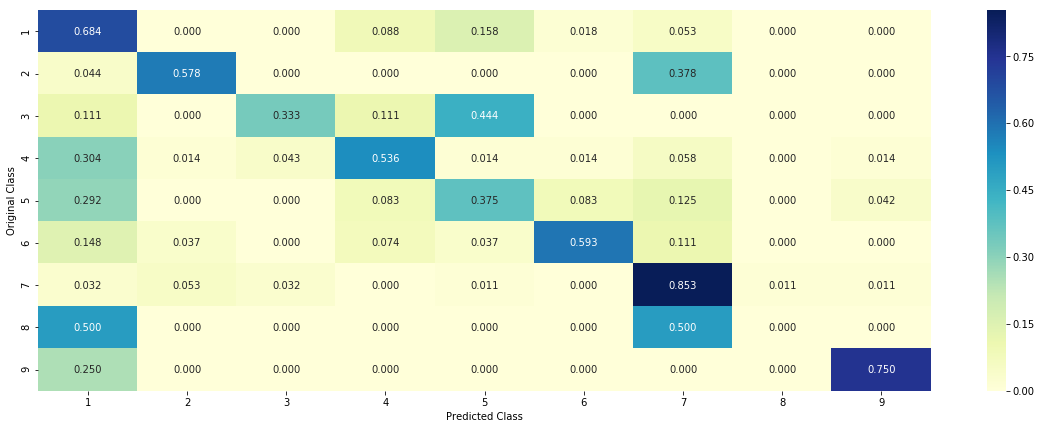

In [207]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,tol=0.00001,n_iter=2000)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

In [141]:
del train_x_onehotCoding,test_x_onehotCoding,cv_x_onehotCoding

# LSTM on text

In [142]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import re
import warnings 
warnings.filterwarnings('ignore')
from subprocess import check_output

Using TensorFlow backend.


In [143]:
tokenizer = Tokenizer( num_words = 30000,split=' ')
tokenizer.fit_on_texts(result['TEXT'].values)
X = tokenizer.texts_to_sequences(result['TEXT'].values)

In [144]:
X = pad_sequences(X, maxlen = 5000)
Y = pd.get_dummies(result['Class']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y,test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2652, 5000) (2652, 9)
(664, 5000) (664, 9)


In [153]:
# create the model
embedding_vecor_length = 128
model = Sequential()
model.add(Embedding(30000, embedding_vecor_length, input_length=5000))
model.add(Dropout(0.8))
model.add(LSTM(64))
model.add(Dense(9, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 5000, 128)         3840000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 5000, 128)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 585       
Total params: 3,889,993
Trainable params: 3,889,993
Non-trainable params: 0
_________________________________________________________________
None


In [154]:
history = model.fit(X_train, Y_train, epochs=25, batch_size=32,validation_data=(X_test, Y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 2652 samples, validate on 664 samples
Epoch 1/25
2652/2652 [==============================] - 404s 152ms/step - loss: 1.9143 - acc: 0.2787 - val_loss: 1.7815 - val_acc: 0.3268
Epoch 2/25
2652/2652 [==============================] - 399s 150ms/step - loss: 1.5921 - acc: 0.4442 - val_loss: 1.5165 - val_acc: 0.4578
Epoch 3/25
2652/2652 [==============================] - 399s 150ms/step - loss: 1.2510 - acc: 0.5641 - val_loss: 1.3184 - val_acc: 0.5648
Epoch 4/25
2652/2652 [==============================] - 397s 150ms/step - loss: 1.0241 - acc: 0.6365 - val_loss: 1.2588 - val_acc: 0.5633
Epoch 5/25
2652/2652 [==============================] - 400s 151ms/step - loss: 0.8963 - acc: 0.6957 - val_loss: 1.2385 - val_acc: 0.5708
Epoch 6/25
2652/2652 [==============================] - 399s 151ms/step - loss: 0.8111 - acc: 0.7244 - val_loss: 1.2879 - val_acc: 0.5678
Epoch 7/25
2652/2652 [==============================] - 401s 151ms/step - loss: 0.7395 - acc: 0.7459 - val_loss: 1.2645 - val

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


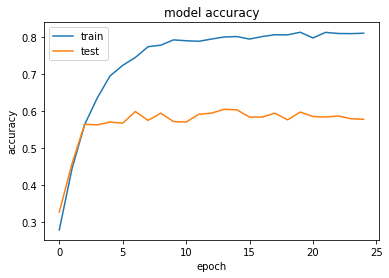

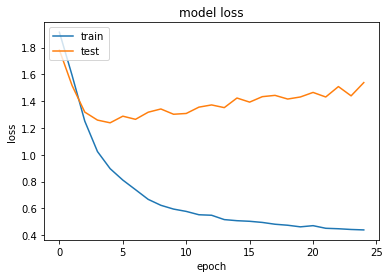

In [155]:
# list all data in history
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

# LSTM + CONV NET + Dropout + Maxpooling

In [148]:
max_features = 30000
maxlen = 5000
embedding_size = 128

# Convolution
kernel_size = 5
filters = 32
pool_size = 4
# LSTM
lstm_output_size = 64
# Training
batch_size = 32
epochs = 5

In [149]:
print('Build model...')

model = Sequential()
model.add(Embedding(30000, 128, input_length=5000))
model.add(Dropout(0.8))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dropout(0.8))
model.add(LSTM(lstm_output_size))
model.add(Dense(9,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5000, 128)         3840000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 5000, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4996, 32)          20512     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1249, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1249, 32)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 585   

In [151]:
print('Train...')
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=5,shuffle=True, validation_data=(X_test, Y_test))

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train...
Train on 2652 samples, validate on 664 samples
Epoch 1/5
2652/2652 [==============================] - 141s 53ms/step - loss: 1.9161 - acc: 0.2617 - val_loss: 1.8337 - val_acc: 0.2877
Epoch 2/5
2652/2652 [==============================] - 138s 52ms/step - loss: 1.8287 - acc: 0.2870 - val_loss: 1.8160 - val_acc: 0.2877
Epoch 3/5
2652/2652 [==============================] - 138s 52ms/step - loss: 1.7588 - acc: 0.3458 - val_loss: 1.7719 - val_acc: 0.3645
Epoch 4/5
2652/2652 [==============================] - 139s 52ms/step - loss: 1.4409 - acc: 0.4774 - val_loss: 1.4622 - val_acc: 0.4684
Epoch 5/5
2652/2652 [==============================] - 138s 52ms/step - loss: 1.2541 - acc: 0.5426 - val_loss: 1.3789 - val_acc: 0.5090
Accuracy: 50.90%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


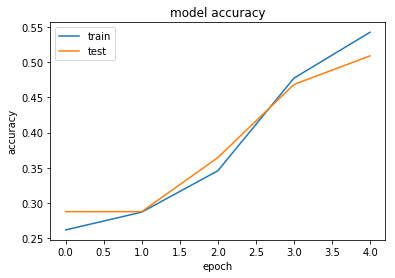

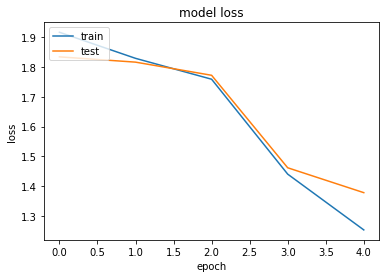

In [152]:
# list all data in history
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();